# Part 1: Data Exploration

In [247]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandasql import sqldf

In [248]:
# Loading json files
df_accounts = pd.read_json("datasets/accounts_anonymized.json")
df_support_cases = pd.read_json("datasets/support_cases_anonymized.json")

# Saving files in csv 
df_accounts.to_csv("datasets/accounts_anonymized.csv", index=False)
df_support_cases.to_csv("datasets/support_cases_anonymized.csv", index=False)


In [249]:
df_accounts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1415 entries, 0 to 1414
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   account_sfid          1415 non-null   object
 1   account_name          1415 non-null   object
 2   account_created_date  1415 non-null   object
 3   account_country       1408 non-null   object
 4   account_industry      1402 non-null   object
dtypes: object(5)
memory usage: 55.4+ KB


In [250]:
df_accounts.head()

,account_sfid,account_name,account_created_date,account_country,account_industry
0,28cb93e07db33a85d12c75825a11ab6a97c5a0df9750f6...,Customer_b9c711e0,2017-12-18 15:53:15,Pakistan,Printing
1,17779701277914218bcfcd9211c3fb6673758ca2f6e014...,Customer_b3e69ecd,2010-01-11 17:41:46,United Kingdom,Household & Personal Products
2,777c8f6154d9e1c1563ce0a62dbd8392ef3204cec6ecd1...,Customer_3b6e1b44,2020-10-19 17:12:22,China,Packaging and Containers
3,e7b6a33c931f01e1e2d42b47318945216da6fef294a738...,Customer_58de6751,2019-03-20 12:56:09,South Korea,Pharmaceuticals
4,fbcec0b147243cfce96df94fe543968c04cfc0a4a29fd7...,Customer_97f3101d,2021-03-24 14:06:24,Poland,Printing


In [251]:
df_accounts.isnull().sum()

account_sfid             0
account_name             0
account_created_date     0
account_country          7
account_industry        13
dtype: int64

### column: account_sfid

In [252]:
# Checking if values ​​are unique
df_accounts['account_sfid'].duplicated().sum()
# We do not have duplicate values! 

0

In [253]:
# We do not have duplicate values! 
df_accounts['account_sfid'].isnull().sum()

0

In [254]:
# Average identifier size
print(df_accounts['account_sfid'].str.len().describe())

count    1415.0
mean       64.0
std         0.0
min        64.0
25%        64.0
50%        64.0
75%        64.0
max        64.0
Name: account_sfid, dtype: float64


In [255]:
# Unique values ​​at the beginning of the identifier (if there is a pattern)
print(df_accounts['account_sfid'].str[:3].value_counts())

account_sfid
c3b    4
36a    4
d63    4
2ba    3
a96    3
      ..
751    1
28a    1
940    1
19c    1
8c3    1
Name: count, Length: 1200, dtype: int64


#### Conclusion
	- Consistency: The column is consistent and without problems (no duplicates or missing values).
	- Standards: The length of IDs is uniform, which facilitates integrations with other datasets.
	- Prefixes: Although prefixes can be interesting for categorization or advanced analysis, there is no indication that you need to touch them now, unless the project calls for something specific.

### Next column: account_name

In [256]:
print(df_accounts['account_name'].nunique())
print(len(df_accounts))

1414
1415


In [257]:
# Check missing values
print(df_accounts['account_name'].isnull().sum())

0


In [258]:
# Check which account names appear most frequently:
print(df_accounts['account_name'].value_counts().head(10))

account_name
Customer_71f8fa02    2
Customer_0540543c    1
Customer_dc34e429    1
Customer_6ba8bdf5    1
Customer_18dc2077    1
Customer_1dba36ab    1
Customer_b217a548    1
Customer_89763bba    1
Customer_5a397a51    1
Customer_dded8830    1
Name: count, dtype: int64


In [259]:
# Check length of names
df_accounts['name_length'] = df_accounts['account_name'].str.len()
print(df_accounts['name_length'].describe())

count    1415.0
mean       17.0
std         0.0
min        17.0
25%        17.0
50%        17.0
75%        17.0
max        17.0
Name: name_length, dtype: float64


In [260]:
# Beginning of names
print(df_accounts['account_name'].str[:3].value_counts().head(10))

# End of names
print(df_accounts['account_name'].str[-3:].value_counts().head(10))

account_name
Cus    1415
Name: count, dtype: int64
account_name
60c    4
d3c    3
ffd    3
72b    3
cd8    3
e8f    3
166    3
682    3
bba    3
a2f    3
Name: count, dtype: int64


In [261]:
print(df_accounts[df_accounts['account_name'].str.contains('Test|Unknown', case=False, na=False)])

Empty DataFrame
Columns: [account_sfid, account_name, account_created_date, account_country, account_industry, name_length]
Index: []


In [262]:
df_accounts.groupby('account_country')['account_name'].nunique()

account_country
Algeria             1
Angola              1
Argentina           3
Australia           8
Austria             8
                 ... 
United Kingdom     51
United States     553
Uruguay             1
Uzbekistan          1
Vietnam             7
Name: account_name, Length: 72, dtype: int64

### We have duplicity in Customer_71f8fa02 , appearing twice, the rest we have only 1.

### Next column: account_created_date

In [263]:
# Converting the column to datetime
df_accounts['account_created_date'] = pd.to_datetime(df_accounts['account_created_date'])
print(df_accounts.dtypes)

account_sfid                    object
account_name                    object
account_created_date    datetime64[ns]
account_country                 object
account_industry                object
name_length                      int64
dtype: object


In [264]:
# Check null values ​​and duplications
print(df_accounts['account_created_date'].isnull().sum())

0


In [265]:
# Extracting part of the date #creates the entire date separately without the time
# Creating derived columns to facilitate future analysis 
df_accounts['year_created'] = df_accounts['account_created_date'].dt.year
df_accounts['month_created'] = df_accounts['account_created_date'].dt.month
df_accounts['day_of_week_created'] = df_accounts['account_created_date'].dt.day_name()

In [266]:
# Analyze distribution over time
df_accounts['year_created'].value_counts().sort_index()

year_created
2007    148
2008     29
2009     35
2010     29
2011     29
2012     28
2013     46
2014     52
2015     50
2016     65
2017     84
2018     81
2019     92
2020     85
2021     93
2022    115
2023    173
2024    180
2025      1
Name: count, dtype: int64

In [267]:
df_accounts['month_created'].value_counts().sort_index()

month_created
1      85
2      91
3     119
4     104
5      99
6     123
7     108
8     121
9     108
10    130
11    244
12     83
Name: count, dtype: int64

In [268]:
df_accounts.groupby(['year_created', 'account_country'])['account_sfid'].count()

year_created  account_country
2007          Australia           1
              Belgium             2
              Canada             18
              Czech Republic      1
              Denmark             1
                                 ..
2024          United Kingdom      6
              United States      44
              Uruguay             1
              Vietnam             2
2025          United Kingdom      1
Name: account_sfid, Length: 421, dtype: int64

### Next column: account_country

In [269]:
# Check null values
print(df_accounts['account_country'].isnull().sum())

7


In [270]:
# Treating the 7 null values!!!!
df_accounts['account_country'] = df_accounts['account_country'].fillna("Unknown")

In [325]:
print(df_accounts['account_country'].nunique())
print(df_accounts['account_country'].unique())

73
['Pakistan' 'United Kingdom' 'China' 'South Korea' 'Poland' 'Singapore'
 'Italy' 'Chile' 'Mexico' 'Germany' 'Belgium' 'United States' 'France'
 'Hungary' 'Canada' 'Japan' 'Malaysia' 'South Africa' 'Slovenia' 'Turkey'
 'Brazil' 'India' 'Unknown' 'Czech Republic' 'Switzerland' 'Romania'
 'Costa Rica' 'Puerto Rico' 'Philippines' 'Vietnam' 'United Arab Emirates'
 'Spain' 'Israel' 'Dominican Republic' 'Thailand' 'Austria' 'Croatia'
 'Egypt' 'Ireland' 'Saudi Arabia' 'Guatemala' 'Lithuania' 'Netherlands'
 'Jordan' 'Uruguay' 'Denmark' 'Australia' 'Colombia' 'Portugal' 'Iceland'
 'Sweden' 'New Zealand' 'Argentina' 'Ecuador' 'Uzbekistan' 'Indonesia'
 'Taiwan' 'Morocco' 'Sri Lanka' 'Kenya' 'Finland' 'Kazakhstan' 'Ukraine'
 'Cyprus' 'Angola' 'Algeria' 'El Salvador' 'Greece' 'Slovakia' 'Latvia'
 'Hong Kong' 'Serbia' 'Paraguay']


In [272]:
country_counts = df_accounts['account_country'].value_counts()
print(country_counts.head(10))

account_country
United States     553
China              73
Canada             68
India              60
United Kingdom     51
Germany            49
Spain              47
South Korea        45
France             33
Brazil             28
Name: count, dtype: int64


In [326]:
country_industry_counts = df_accounts.groupby(['account_country', 'account_industry'])['account_sfid'].count()
print(country_industry_counts)

account_country  account_industry        
Algeria          Pharmaceuticals             1
Angola           Printing                    1
Argentina        Food & Beverage             1
                 Materials                   1
                 Packaging and Containers    1
                                            ..
Vietnam          Food                        1
                 Food & Beverage             1
                 Materials                   1
                 Packaging and Containers    2
                 Printing                    2
Name: account_sfid, Length: 340, dtype: int64


### Next column: account_industry

In [274]:
# Checking for null values!
print(df_accounts['account_industry'].isnull().sum())

13


In [275]:
# Treating the 13 null values!!!
df_accounts['account_industry'] = df_accounts['account_industry'].fillna("Unknown")

In [276]:
print(df_accounts['account_industry'].nunique())
print(df_accounts['account_industry'].unique())

23
['Printing' 'Household & Personal Products' 'Packaging and Containers'
 'Pharmaceuticals' 'Advertising & Branding Agency' 'Unknown'
 'Food & Beverage' 'Medical Devices' 'Chemicals' 'Materials' 'Government'
 'Information Technology' 'Other' 'Financials' 'Education' 'Advertising'
 'Food' 'Agriculture Chemicals' 'Agencies' 'Industry' 'Automotive'
 'Household' 'Consumer Packaged Goods']


In [277]:
industry_counts = df_accounts['account_industry'].value_counts()
print(industry_counts.head(10))

account_industry
Pharmaceuticals                  421
Printing                         265
Packaging and Containers         252
Household & Personal Products     86
Food & Beverage                   78
Advertising & Branding Agency     66
Medical Devices                   60
Other                             56
Information Technology            29
Chemicals                         27
Name: count, dtype: int64


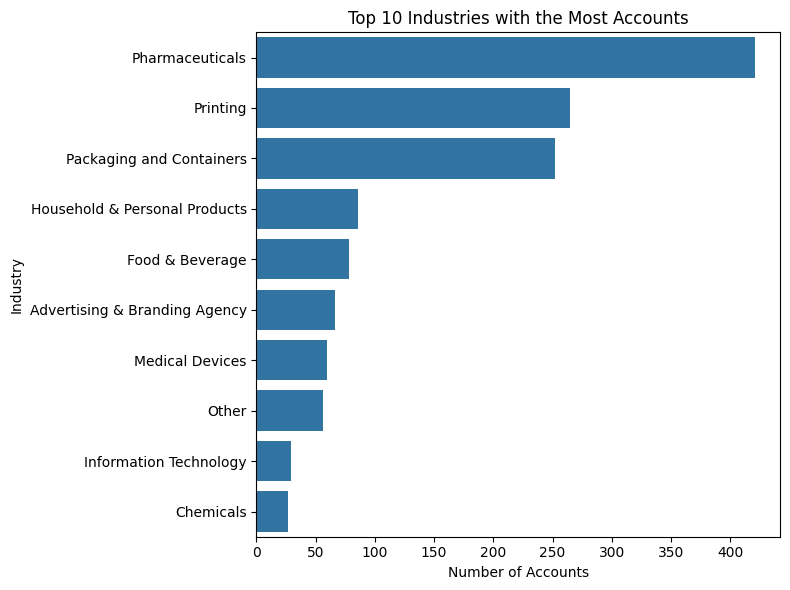

In [328]:
top_industries = industry_counts.head(10)  # Select the 10 most frequent industries

plt.figure(figsize=(8, 6))
sns.barplot(x=top_industries.values, y=top_industries.index)
plt.title("Top 10 Industries with the Most Accounts")
plt.xlabel("Number of Accounts")
plt.ylabel("Industry")
plt.tight_layout()
plt.show()

In [279]:
df_country_industry = df_accounts.groupby(['account_country', 'account_industry'])['account_sfid'].count()
print(df_country_industry.head(10))

account_country  account_industry             
Algeria          Pharmaceuticals                  1
Angola           Printing                         1
Argentina        Food & Beverage                  1
                 Materials                        1
                 Packaging and Containers         1
Australia        Advertising & Branding Agency    1
                 Food & Beverage                  1
                 Packaging and Containers         1
                 Pharmaceuticals                  1
                 Printing                         3
Name: account_sfid, dtype: int64


## analyze df_support_cases

In [280]:
df_support_cases

,case_sfid,account_sfid,case_number,case_contact_name,case_product,case_status,case_resolution,case_details,case_closure,case_priority,case_severity,case_reason,case_type,case_category,case_created_date,case_closed_date
0,c9f05bc582a8abec4c5f1a9385c24a96d86d3f3093c557...,58912bf7e5131400adbc1c1521158b7b8cc2f2f3fbd51f...,69908,Contact_e2737240,Verify Enterprise,Closed,Done,Trial,Undefined,Normal,Medium,Other,License Activation,Licensing,2025-01-09,2025-01-09
1,a8f7c39a437d713e800599205d6cd9319733fd5df18af8...,3675a0565672bccecbba8a8a102b0482f3c82e6f07443e...,69887,Contact_20439d47,GVD Perpetual,Closed,Done,Trial,Undefined,Normal,Low,Other,License Activation,Licensing,2025-01-09,2025-01-09
2,654dd0c826e0842cdd030e935aa1e886787cb990b693c2...,58912bf7e5131400adbc1c1521158b7b8cc2f2f3fbd51f...,69910,Contact_edf7784e,Verify Enterprise,Closed,Done,Trial,Undefined,Normal,Low,Other,License Activation,Licensing,2025-01-09,2025-01-09
3,57422ac55031dd6c7acf36a2bc6d74e01e0c0194c61318...,908d42c9a4e3f4beae8bf394dd2ed82090a219cdf64518...,69905,Contact_6f59abbf,Verify,Closed,Done,Full,Undefined,Normal,Medium,Other,License Activation,Licensing,2025-01-09,2025-01-09
4,b88c12d55a7c468c96e48a7693e306e24f44947f5f1e3f...,None,69891,Contact_f02dfb7d,Other,New,Undefined,Undefined,Undefined,Normal,Undefined,Other,Undefined,Undefined,2025-01-09,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0fc118ce4e9fac11b53e80c208d35445851730c9e8c838...,None,59751,Contact_f02dfb7d,Other,Duplicate,Undefined,Undefined,Undefined,Normal,Undefined,Other,Undefined,Undefined,2023-11-22,2023-11-22
9996,6b384dc4f5960df1f75f1721aafd565fcf7dc5c2ded1f8...,ff2ebcf997b631d6a92bfb8ac3050777f0896100708740...,59745,Contact_fb1bda0d,Digital Platform,Closed,No Customer Response,Undefined,Undefined,Normal,Low,Other,Crash,Software,2023-11-22,2023-12-08
9997,41393bdd653bfa66124e8969a79a74808081a8c01815ab...,48a5c2ff83657d99d8affb23e6e78cb300a66e2e953b44...,59756,Contact_b0933c5a,GVW,Closed,Fixed,Undefined,Undefined,Normal,Medium,Other,User Access Issue,Licensing,2023-11-22,2023-11-28
9998,f89a8181d96ce0bc56d79beb8220846d4916727efa9259...,d9423ed8aad410675137fe06e9ba52034072eea5c3fc34...,59747,Contact_6cde7782,GVD,Closed,Cancelled,Module Affected: Application,Undefined,Normal,Medium,Other,Software Performance,Software,2023-11-22,2023-11-24


In [281]:
df_support_cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   case_sfid          10000 non-null  object
 1   account_sfid       8407 non-null   object
 2   case_number        10000 non-null  int64 
 3   case_contact_name  10000 non-null  object
 4   case_product       10000 non-null  object
 5   case_status        10000 non-null  object
 6   case_resolution    10000 non-null  object
 7   case_details       10000 non-null  object
 8   case_closure       10000 non-null  object
 9   case_priority      10000 non-null  object
 10  case_severity      10000 non-null  object
 11  case_reason        10000 non-null  object
 12  case_type          10000 non-null  object
 13  case_category      10000 non-null  object
 14  case_created_date  10000 non-null  object
 15  case_closed_date   9058 non-null   object
dtypes: int64(1), object(15)
memory usage: 1.2

In [282]:
df_support_cases.head()

,case_sfid,account_sfid,case_number,case_contact_name,case_product,case_status,case_resolution,case_details,case_closure,case_priority,case_severity,case_reason,case_type,case_category,case_created_date,case_closed_date
0,c9f05bc582a8abec4c5f1a9385c24a96d86d3f3093c557...,58912bf7e5131400adbc1c1521158b7b8cc2f2f3fbd51f...,69908,Contact_e2737240,Verify Enterprise,Closed,Done,Trial,Undefined,Normal,Medium,Other,License Activation,Licensing,2025-01-09,2025-01-09
1,a8f7c39a437d713e800599205d6cd9319733fd5df18af8...,3675a0565672bccecbba8a8a102b0482f3c82e6f07443e...,69887,Contact_20439d47,GVD Perpetual,Closed,Done,Trial,Undefined,Normal,Low,Other,License Activation,Licensing,2025-01-09,2025-01-09
2,654dd0c826e0842cdd030e935aa1e886787cb990b693c2...,58912bf7e5131400adbc1c1521158b7b8cc2f2f3fbd51f...,69910,Contact_edf7784e,Verify Enterprise,Closed,Done,Trial,Undefined,Normal,Low,Other,License Activation,Licensing,2025-01-09,2025-01-09
3,57422ac55031dd6c7acf36a2bc6d74e01e0c0194c61318...,908d42c9a4e3f4beae8bf394dd2ed82090a219cdf64518...,69905,Contact_6f59abbf,Verify,Closed,Done,Full,Undefined,Normal,Medium,Other,License Activation,Licensing,2025-01-09,2025-01-09
4,b88c12d55a7c468c96e48a7693e306e24f44947f5f1e3f...,None,69891,Contact_f02dfb7d,Other,New,Undefined,Undefined,Undefined,Normal,Undefined,Other,Undefined,Undefined,2025-01-09,None


In [283]:
df_support_cases.isnull().sum() 

case_sfid               0
account_sfid         1593
case_number             0
case_contact_name       0
case_product            0
case_status             0
case_resolution         0
case_details            0
case_closure            0
case_priority           0
case_severity           0
case_reason             0
case_type               0
case_category           0
case_created_date       0
case_closed_date      942
dtype: int64

In [284]:
df_support_cases.describe()

,case_number
count,10000.000000
mean,64884.845700
std,2914.373454
min,59745.000000
25%,62388.750000
50%,64890.500000
75%,67406.250000
max,69911.000000


In [285]:
df_support_cases.duplicated().sum()

0

In [329]:
# Filling in unknown values ​​as Null see command that sets null
df_support_cases['account_sfid'] = df_support_cases['account_sfid'].fillna("Unknown")

In [331]:
df_support_cases['case_created_date'] = pd.to_datetime(df_support_cases['case_created_date'])
print(df_support_cases.dtypes)

case_sfid                    object
account_sfid                 object
case_number                   int64
case_contact_name            object
case_product                 object
case_status                  object
case_resolution              object
case_details                 object
case_closure                 object
case_priority                object
case_severity                object
case_reason                  object
case_type                    object
case_category                object
case_created_date    datetime64[ns]
case_closed_date     datetime64[ns]
dtype: object


In [288]:
print(df_support_cases['case_number'].value_counts().head(10))

case_number
69908    1
63235    1
63233    1
63201    1
63206    1
63221    1
63207    1
63227    1
63217    1
63219    1
Name: count, dtype: int64


In [289]:
print(df_support_cases['case_product'].value_counts().head(10))

case_product
GVD                   2850
Other                 2573
Verify                1028
Not a Support Case    1024
GVW                    825
Esko                   356
Verify Enterprise      231
GVD Enterprise         176
GVD Perpetual          156
Print Inspection       148
Name: count, dtype: int64


In [290]:
print(df_support_cases['case_status'].value_counts().head(10))

case_status
Closed                      7043
Duplicate                   2015
New                          795
Waiting On Customer           45
Working                       39
Sent_To_Dev                   35
Waiting for 3rd Party         10
Assigned                       9
Remote Session Scheduled       9
Name: count, dtype: int64


In [291]:
print(df_support_cases['case_resolution'].value_counts().head(10))

case_resolution
Undefined               4064
Done                    3304
Fixed                   1413
No Customer Response     768
Known Issue              168
Cancelled                150
Cannot Reproduce          79
Training Provided         53
Custom Profile             1
Name: count, dtype: int64


In [292]:
print(df_support_cases['case_type'].value_counts().head(10))

case_type
Undefined               3728
License Activation      2963
Software Question        720
Software Performance     708
User Access Issue        623
Inspection Results       430
License Issue            226
Crash                    195
Hardware Question         96
Bug                       94
Name: count, dtype: int64


In [293]:
print(df_support_cases['case_category'].value_counts().head(10))

case_category
Licensing                 3847
Undefined                 3635
Software                  2204
Hardware                   183
Server & Configuration      49
Order Services              48
Not a Support Case          34
Name: count, dtype: int64


# Part 2: Data Processing

### 1. Number of Cases by Country
- Discover in which countries support is most demanded. This helps the business understand where there is the greatest need for service or possible recurring problems by region.

In [294]:
# Helper function to execute SQL queries in pandasql
pysqldf = lambda q: sqldf(q, globals())

# SQL Query
query = """
SELECT
    a.account_country,
    COUNT(s.case_sfid) AS total_cases
FROM df_accounts AS a
LEFT JOIN df_support_cases AS s
    ON a.account_sfid = s.account_sfid
GROUP BY a.account_country
ORDER BY total_cases DESC
"""
# Execute the query and store the result in a DataFrame
df_cases_percountry = pysqldf(query)

# View the first lines
print(df_cases_percountry.head())

  account_country  total_cases
0   United States         3383
1          Canada         1967
2           China          399
3           India          251
4  United Kingdom          239


### 2. Number of Cases by Industry
- Reveals which sectors require the most support. Useful for prioritizing specialized support teams or developing specific solutions for certain industries.

In [295]:
# Helper function to execute SQL queries in pandasql
pysqldf = lambda q: sqldf(q, globals())

# SQL Query
query = """
SELECT
    a.account_industry,
    COUNT(s.case_sfid) AS total_cases
FROM df_accounts AS a
JOIN df_support_cases AS s
    ON a.account_sfid = s.account_sfid
GROUP BY a.account_industry
ORDER BY total_cases DESC
"""

# Execute the query and store the result in a DataFrame
df_cases_industry = pysqldf(query)

# View the first lines
print(df_cases_industry.head())

                account_industry  total_cases
0                Pharmaceuticals         2393
1         Information Technology         1849
2                       Printing         1154
3       Packaging and Containers         1072
4  Advertising & Branding Agency          475


### 3. Number of Cases per Account (TOP 5)
- Identifies the 5 most active accounts in support. These accounts can be important customers or customers with a lot of problems. This guides the support team in planning proactive actions.

In [296]:
# Helper function to execute SQL queries in pandasql
pysqldf = lambda q: sqldf(q, globals())

# SQL Query
query = """
SELECT
    a.account_sfid,
    a.account_name,
    COUNT(s.case_sfid) AS total_cases
FROM df_accounts AS a
JOIN df_support_cases AS s
    ON a.account_sfid = s.account_sfid
GROUP BY a.account_sfid, a.account_name
ORDER BY total_cases DESC
LIMIT 5
"""

# Execute the query and store the result in a DataFrame
df_cases_account = pysqldf(query)
# View the first lines
print(df_cases_account.head())

                                        account_sfid       account_name  \
0  87b5772b6964f23ef7db8085e8f91c41937979575f8afd...  Customer_900e52a5   
1  0e45934f296ca9a462fb43e3d47246ced1379555d4eb3e...  Customer_a8719d37   
2  a6b6a3deac72bfbd98608d35a5c4d165e05ff0a89debb2...  Customer_5eb51762   
3  1a179a8a319d12ad422050acbdc3866347a5e629d56090...  Customer_a8fc29fc   
4  e2494728998b67f23f0e57ef2441feb32e15911b3c9f13...  Customer_2b583155   

   total_cases  
0         1650  
1          226  
2          165  
3          107  
4           73  


### 4. Average Resolution Time per Account
- Measures in days how long it takes, on average, to resolve cases for each account. Allows you to compare:
- Accounts with high resolution times, which may be unsatisfied.
- Accounts with low resolution times, a sign of more efficient processes.

In [297]:
# Helper function to execute SQL queries in pandasql
pysqldf = lambda q: sqldf(q, globals())

# SQL Query
query = """
SELECT
    a.account_sfid,
    a.account_name,
    AVG(
       JULIANDAY(s.case_closed_date) - JULIANDAY(s.case_created_date)
    ) AS avg_resolution_days
FROM df_accounts AS a
JOIN df_support_cases AS s
    ON a.account_sfid = s.account_sfid
WHERE s.case_closed_date IS NOT NULL
GROUP BY a.account_sfid, a.account_name
ORDER BY avg_resolution_days DESC
"""

# Execute the query and store the result in a DataFrame
df_time_resolution = pysqldf(query)
# View the first lines
print(df_time_resolution.head())

                                        account_sfid       account_name  \
0  ebbd974534c2731cb6a3516e4512aa3e699e4b2aa9918e...  Customer_efbea522   
1  0ac1c94865505d38033b228dcc43c6be542f750b62f2cd...  Customer_d50e3196   
2  d1b05d35565572bd179161ebb9d1656c6c2e4019c93a82...  Customer_672604ad   
3  ec5c669689f18c7e893f7ffab740913cd9240679b147e5...  Customer_87ba4119   
4  11b9ee9da51b36bcdaa430768f681c47f767dcac7414b7...  Customer_2e9f4b77   

   avg_resolution_days  
0                161.0  
1                158.0  
2                149.0  
3                110.0  
4                 97.5  


### 5. Distribution of Cases by Severity
- Allows you to know the predominant level of severity in cases, helping the support team to scale efforts (e.g., if the majority are of high severity, more resource allocation is needed).

In [298]:
# Helper function to execute SQL queries in pandasql
pysqldf = lambda q: sqldf(q, globals())

# SQL Query
query = """
SELECT
    s.case_severity,
    COUNT(s.case_sfid) AS total_cases
FROM df_support_cases AS s
GROUP BY s.case_severity
ORDER BY total_cases DESC
"""

# Execute the query and store the result in a DataFrame
df_severity_cases = pysqldf(query)

# View the first lines
print(df_severity_cases.head())

  case_severity  total_cases
0        Medium         4078
1           Low         3159
2     Undefined         2659
3          High           72
4        Urgent           32


### 6. Distribution of Cases by Priority
- Similar to severity, it identifies how urgent most cases are. If many cases are “High Priority”, the company may need to review triage processes.

In [299]:
# Helper function to execute SQL queries in pandasql
pysqldf = lambda q: sqldf(q, globals())

# SQL Query
query = """
SELECT
    s.case_priority,
    COUNT(s.case_sfid) AS total_cases
FROM df_support_cases AS s
GROUP BY s.case_priority
ORDER BY total_cases DESC
"""

# Execute the query and store the result in a DataFrame
df_priority_cases = pysqldf(query)

# View the first lines
print(df_priority_cases.head())

  case_priority  total_cases
0        Normal         9811
1        Urgent          152
2  not_priority           35
3          High            2


### 7. Resolution time per country

- • Insight: Helps understand regional variations in resolution time. There may be language barriers, time zones, or other factors in certain countries.

In [300]:
# Helper function to execute SQL queries in pandasql
pysqldf = lambda q: sqldf(q, globals())

# SQL Query
query = """
SELECT
    a.account_country,
    AVG(JULIANDAY(s.case_closed_date) - JULIANDAY(s.case_created_date)) AS avg_resolution_days
FROM df_accounts a
JOIN df_support_cases s
    ON a.account_sfid = s.account_sfid
WHERE s.case_closed_date IS NOT NULL
GROUP BY a.account_country
ORDER BY avg_resolution_days DESC
"""

# Execute the query and store the result in a DataFrame
df_time_per_country = pysqldf(query)

# View the first lines
print(df_time_per_country.head())

  account_country  avg_resolution_days
0        Pakistan            39.000000
1       Lithuania            31.916667
2         Unknown            21.818182
3          Cyprus            13.666667
4         Algeria            13.000000


# Part 3: Data Visualization

## Section 1 - Overview (Generic Charts)

#### 1.1 - Number of cases per country

/var/folders/86/t0s56lw963l8hq8z4bszh1j40000gn/T/ipykernel_1026/833145127.py:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




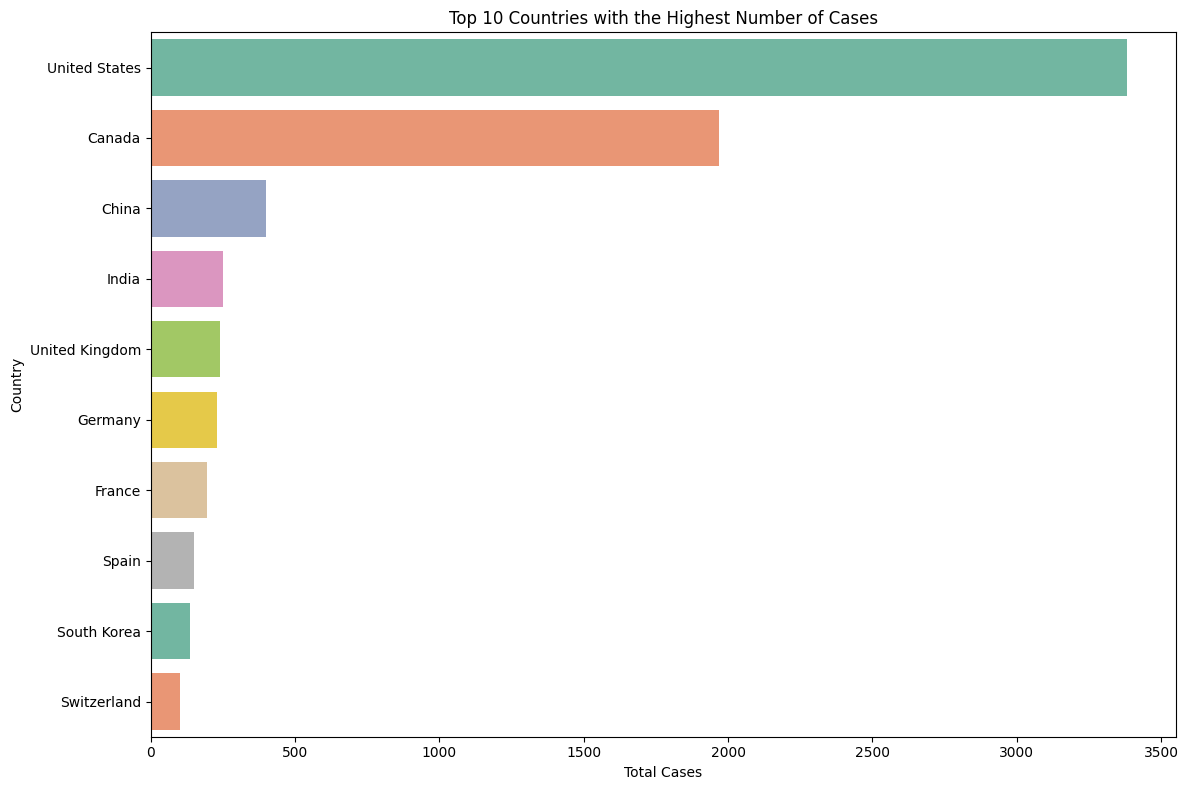

In [301]:
# Assuming df_accounts and df_support_cases are already loaded, let's merge them
df_combined = pd.merge(df_support_cases, df_accounts, on='account_sfid', how='inner')

# Group the data by country and count the number of cases created
df_cases_by_country = df_combined.groupby('account_country').size().reset_index(name='total_cases')

# Sort the data in descending order to display countries with the most cases
df_cases_by_country = df_cases_by_country.sort_values('total_cases', ascending=False)

# Select the top 10 countries with the highest number of cases
df_top10_cases_by_country = df_cases_by_country.head(10)

# Plot the bar chart to visualize the number of cases by country
plt.figure(figsize=(12, 8))
sns.barplot(
    data=df_top10_cases_by_country, 
    x='total_cases', 
    y='account_country', 
    palette='Set2'  # Distinct colors for countries
)

plt.title('Top 10 Countries with the Highest Number of Cases')
plt.xlabel('Total Cases')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

#### 1.2 - Distribution of cases by country (Pie - TOP 5 + OTHERS)

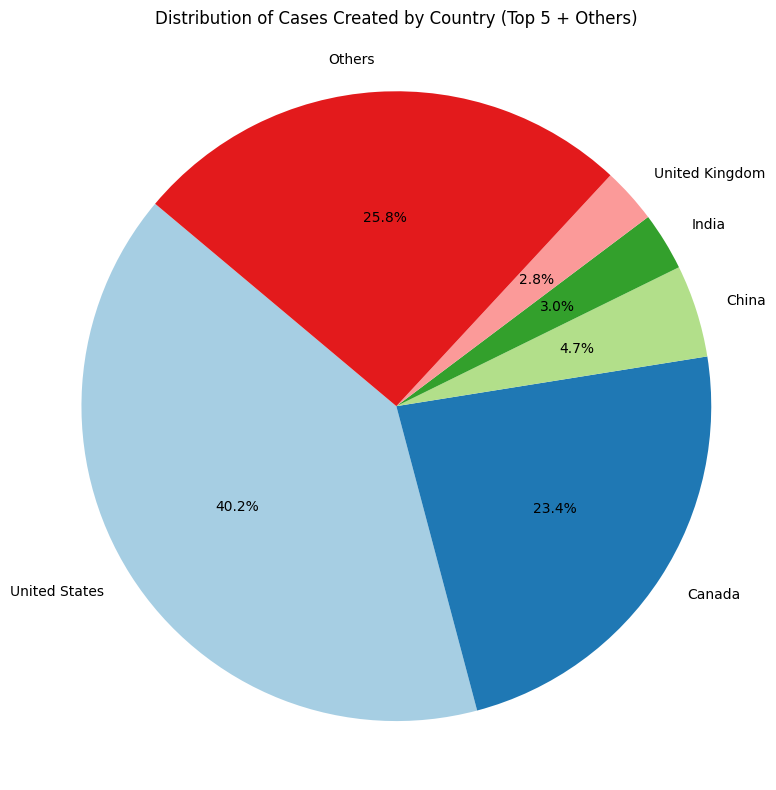

In [302]:
# Group the data by country and count the number of created cases
df_cases_by_country = df_combined.groupby('account_country').size().reset_index(name='total_cases')

# Sort the data in descending order and get the top 5 countries
df_top5_countries = df_cases_by_country.sort_values('total_cases', ascending=False).head(5)

# Sum the cases from other countries and create a new row "Others"
df_other_countries = df_cases_by_country[~df_cases_by_country['account_country'].isin(df_top5_countries['account_country'])]
df_other_countries_sum = df_other_countries['total_cases'].sum()

# Create a DataFrame with the 'Others' row
df_others = pd.DataFrame({'account_country': ['Others'], 'total_cases': [df_other_countries_sum]})

# Combine the DataFrames using pd.concat
df_top5_countries = pd.concat([df_top5_countries, df_others], ignore_index=True)

# Plot the pie chart to show the distribution of cases by country (Top 5 + Others)
plt.figure(figsize=(8, 8))
plt.pie(df_top5_countries['total_cases'], 
        labels=df_top5_countries['account_country'], 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=plt.cm.Paired.colors)

plt.title('Distribution of Cases Created by Country (Top 5 + Others)')
plt.axis('equal')  # Ensures the chart is circular
plt.tight_layout()
plt.show()

#### 1.3 Account Distribution by Country

In [303]:
import plotly.express as px 

# Group the accounts data by country and count the number of accounts
df_map = df_accounts.groupby('account_country', as_index=False)['account_sfid'].count()
df_map.columns = ['country', 'accounts_count']

# Create a choropleth map to visualize the distribution of accounts by country
fig = px.choropleth(
    df_map,
    locations="country",
    locationmode="country names",
    color="accounts_count",
    color_continuous_scale=px.colors.sequential.Plasma,
    title="Distribution of Accounts by Country"
)
fig.show()

#### 1.4 - Number of Accounts by Country

/var/folders/86/t0s56lw963l8hq8z4bszh1j40000gn/T/ipykernel_1026/2751959145.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




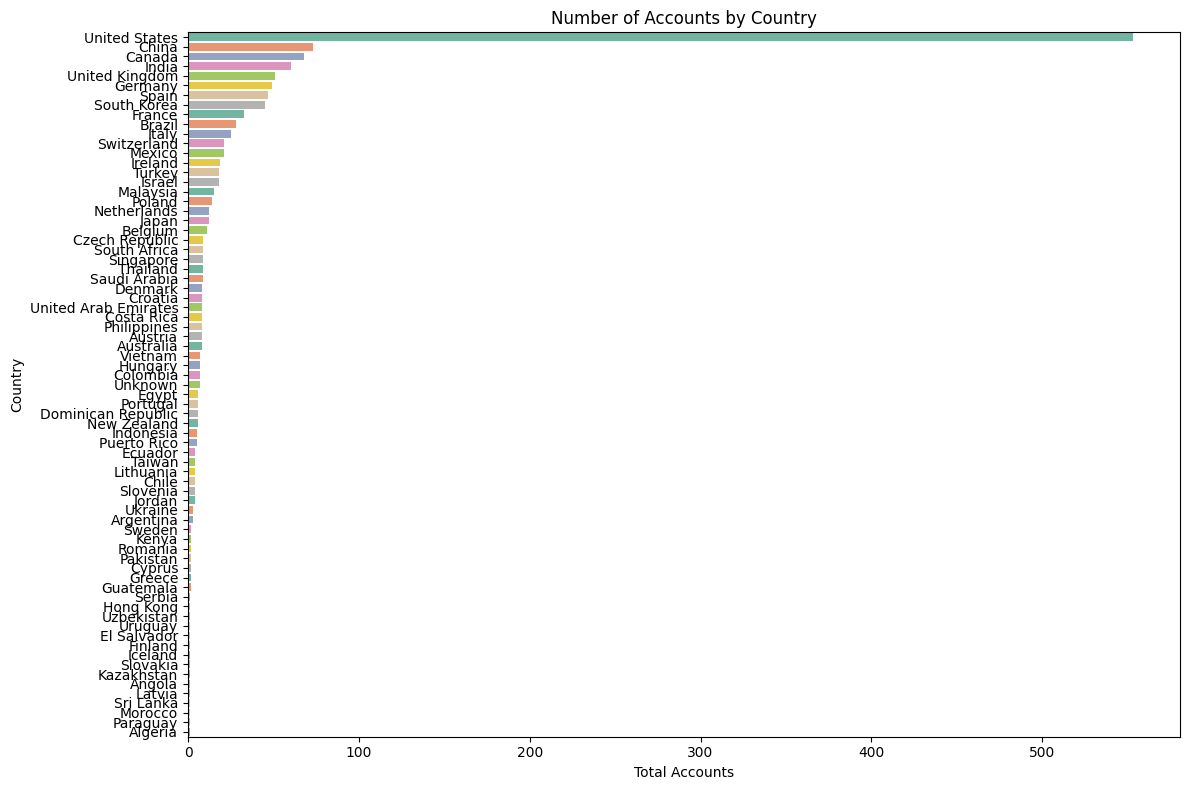

In [304]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group the data by country and count the number of accounts in each country
df_accounts_by_country = df_accounts.groupby('account_country').size().reset_index(name='total_accounts')

# Sort the countries by the number of accounts in descending order
df_accounts_by_country = df_accounts_by_country.sort_values('total_accounts', ascending=False)

# Plot the bar chart to visualize the number of accounts by country
plt.figure(figsize=(12, 8))
sns.barplot(
    data=df_accounts_by_country, 
    x='total_accounts', 
    y='account_country', 
    palette='Set2'  # Distinct colors for the countries
)

plt.title('Number of Accounts by Country')
plt.xlabel('Total Accounts')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

## Section 2 - Severity and Priority Analysis

#### 2.1 - Distribution of cases by Severity

/var/folders/86/t0s56lw963l8hq8z4bszh1j40000gn/T/ipykernel_1026/3425044751.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




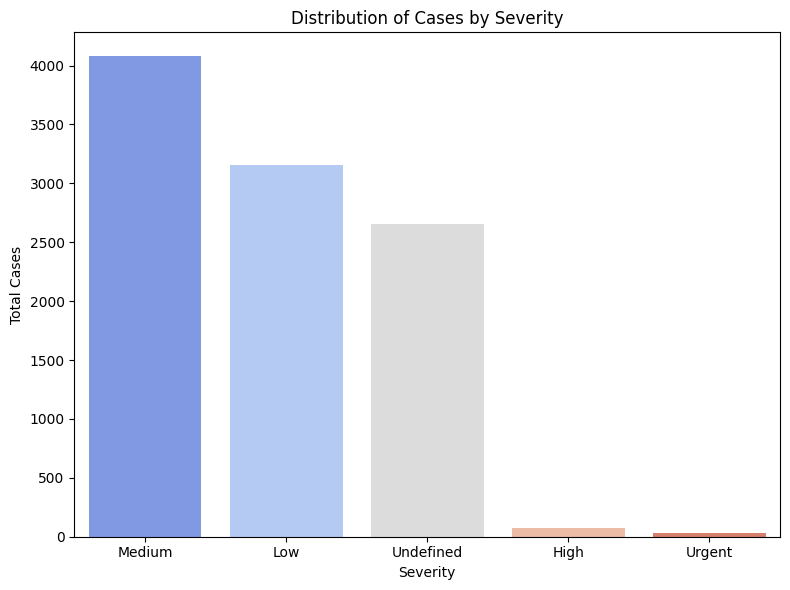

In [305]:

# Sort the cases by severity
df_severity_cases = df_severity_cases.sort_values("total_cases", ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(
    data=df_severity_cases, 
    x="case_severity", 
    y="total_cases",
    palette="coolwarm"
)

plt.title("Distribution of Cases by Severity")
plt.xlabel("Severity")
plt.ylabel("Total Cases")
plt.tight_layout()
plt.show()

#### 2.3 - Distribution of Cases by Priority

/var/folders/86/t0s56lw963l8hq8z4bszh1j40000gn/T/ipykernel_1026/3388847436.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




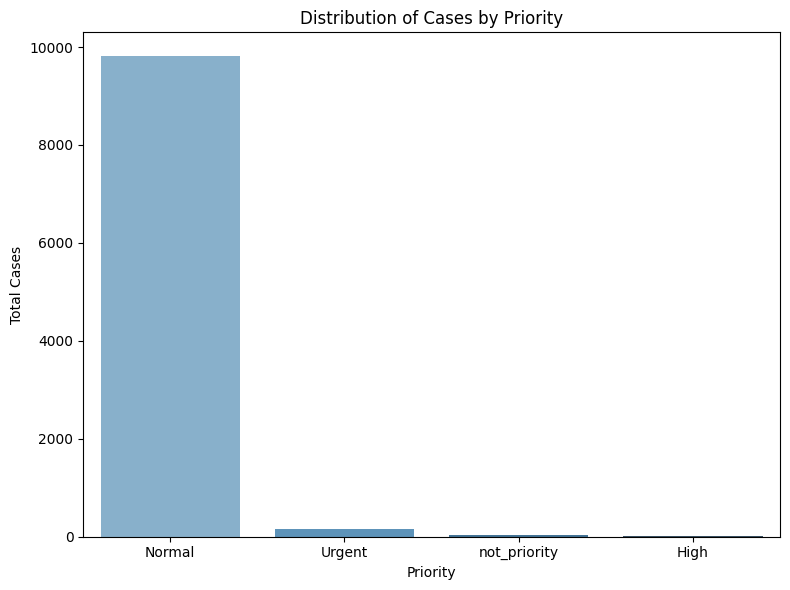

In [306]:

# Sort the DataFrame
df_priority_cases = df_priority_cases.sort_values("total_cases", ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(
    data=df_priority_cases, 
    x="case_priority", 
    y="total_cases", 
    palette="Blues_d"
)

plt.title("Distribution of Cases by Priority")
plt.xlabel("Priority")
plt.ylabel("Total Cases")
plt.tight_layout()
plt.show()

#### 2.4 - Distribution of Serious Cases by Country (United States)

/var/folders/86/t0s56lw963l8hq8z4bszh1j40000gn/T/ipykernel_1026/3734059673.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




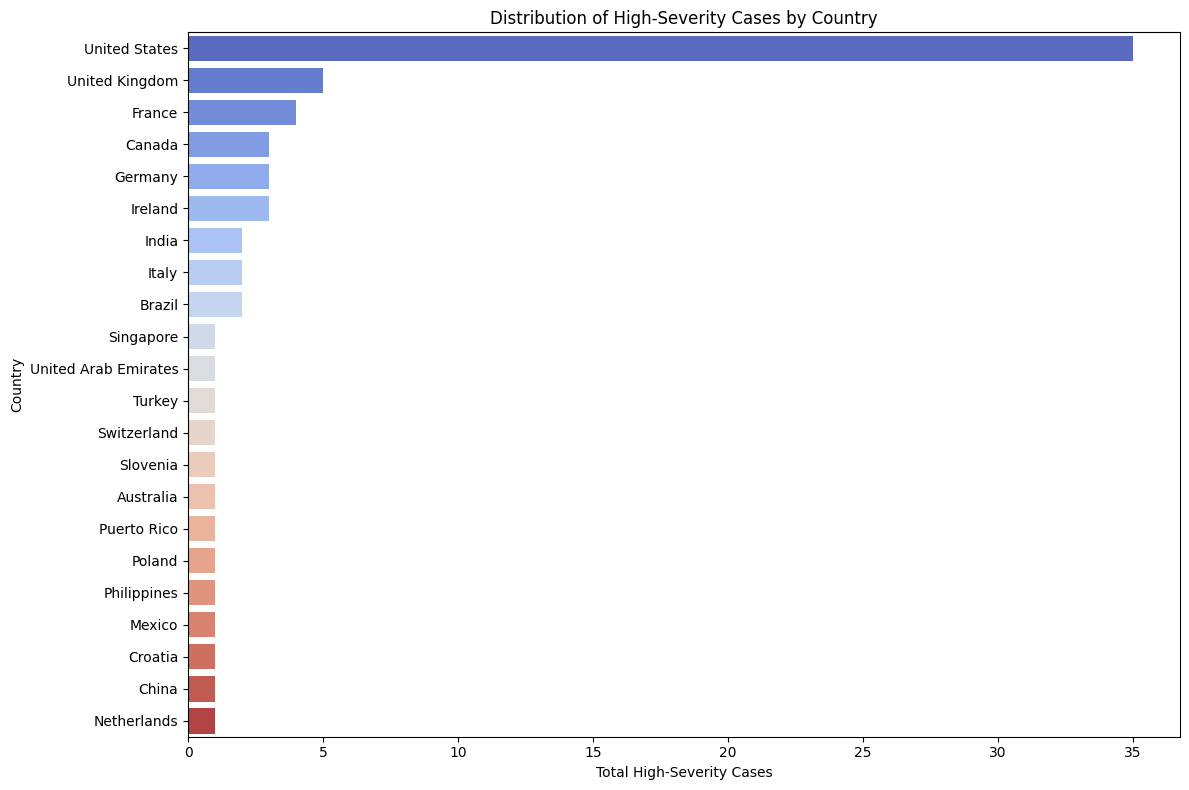

In [307]:

# Filter the data for high-severity cases (e.g., "Critical" or "High")
df_high_severity = df_combined[df_combined['case_severity'].isin(['Critical', 'High'])]

# Group the data by country and severity to count the high-severity cases
df_severity_by_country = df_high_severity.groupby('account_country').size().reset_index(name='total_cases')

# Sort the data in descending order to display countries with the most high-severity cases
df_severity_by_country = df_severity_by_country.sort_values('total_cases', ascending=False)

# Plot the bar chart to visualize the countries with the most high-severity cases
plt.figure(figsize=(12, 8))
sns.barplot(
    data=df_severity_by_country, 
    x='total_cases', 
    y='account_country', 
    palette='coolwarm'  # Distinct colors for the countries
)

plt.title('Distribution of High-Severity Cases by Country')
plt.xlabel('Total High-Severity Cases')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

#### 2.5 - Distribution of Serious Cases by Industry in the USA

/var/folders/86/t0s56lw963l8hq8z4bszh1j40000gn/T/ipykernel_1026/3585036715.py:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




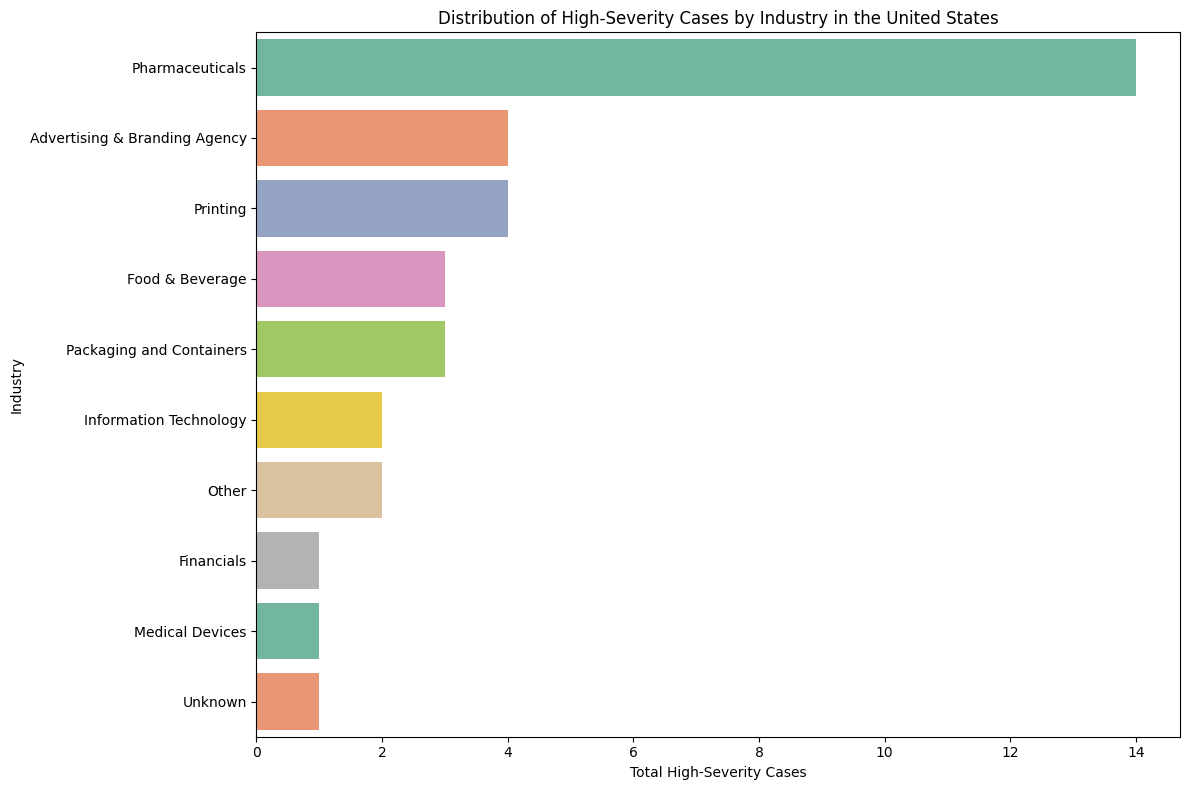

In [308]:

# Filter the data for high-severity cases (e.g., "Critical" or "High") in the United States
df_us_high_severity = df_combined[(df_combined['account_country'] == 'United States') & 
                                  (df_combined['case_severity'].isin(['Critical', 'High']))]

# Group the data by industry to count high-severity cases in the United States
df_severity_by_industry_us = df_us_high_severity.groupby('account_industry').size().reset_index(name='total_cases')

# Sort the data in descending order to display industries with the most high-severity cases
df_severity_by_industry_us = df_severity_by_industry_us.sort_values('total_cases', ascending=False)

# Plot the bar chart to visualize industries with the most high-severity cases in the US
plt.figure(figsize=(12, 8))
sns.barplot(
    data=df_severity_by_industry_us, 
    x='total_cases', 
    y='account_industry', 
    palette='Set2'  # Distinct colors for industries
)

plt.title('Distribution of High-Severity Cases by Industry in the United States')
plt.xlabel('Total High-Severity Cases')
plt.ylabel('Industry')
plt.tight_layout()
plt.show()

## Section 3 - Specific Analysis of Industries and Types of Calls

#### 3.1 - Industries Related to the Top 3 Countries

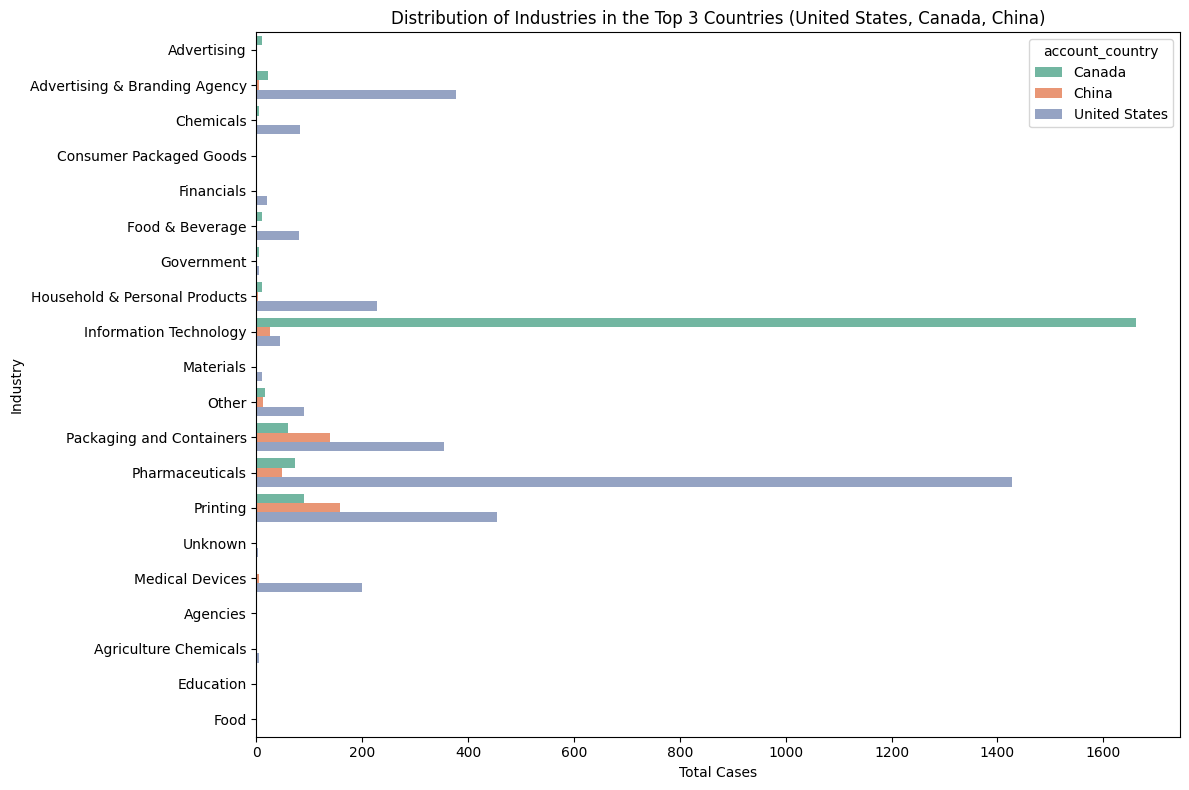

In [309]:
# Filter the data for the countries of interest: United States, Canada, China
df_filtered_countries = df_combined[df_combined['account_country'].isin(['United States', 'Canada', 'China'])]

# Group the data by country and industry to count the cases
df_industry_by_country = df_filtered_countries.groupby(['account_country', 'account_industry']).size().reset_index(name='total_cases')

# Plot the bar chart to visualize the predominant industries in the selected countries
plt.figure(figsize=(12, 8))
sns.barplot(
    data=df_industry_by_country, 
    x='total_cases', 
    y='account_industry', 
    hue='account_country', 
    palette='Set2'  # Distinct colors for countries
)

plt.title('Distribution of Industries in the Top 3 Countries (United States, Canada, China)')
plt.xlabel('Total Cases')
plt.ylabel('Industry')
plt.tight_layout()
plt.show()

#### 3.2 - Number of cases by Industry

/var/folders/86/t0s56lw963l8hq8z4bszh1j40000gn/T/ipykernel_1026/3335223440.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




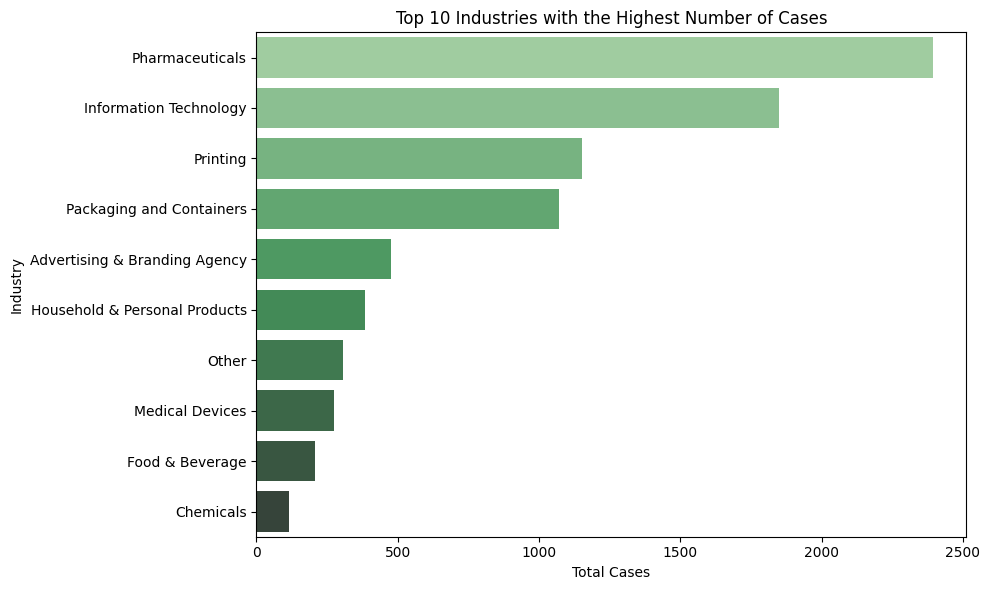

In [310]:
# Sort the DataFrame in descending order
df_cases_industry = df_cases_industry.sort_values("total_cases", ascending=False)

# Select the top 10 industries with the highest number of cases
df_top10_industries = df_cases_industry.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_top10_industries, 
    x="total_cases", 
    y="account_industry",
    palette="Greens_d"
)

plt.title("Top 10 Industries with the Highest Number of Cases")
plt.xlabel("Total Cases")
plt.ylabel("Industry")
plt.tight_layout()
plt.show()

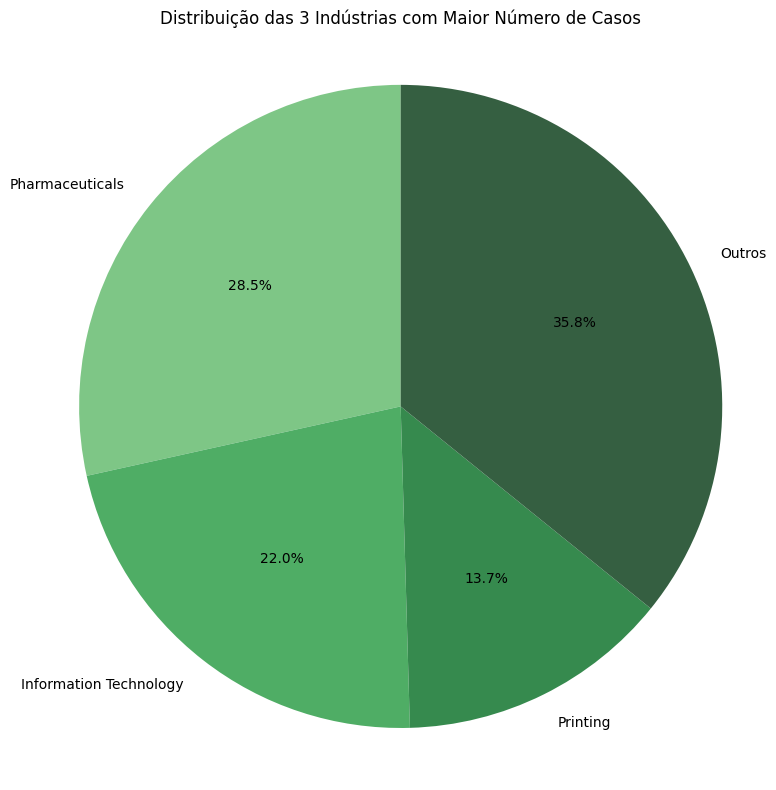

In [311]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ordena o DataFrame decrescente
df_cases_industry = df_cases_industry.sort_values("total_cases", ascending=False)

# Seleciona as 3 indústrias com mais casos
df_top3_industries = df_cases_industry.head(3)

# Soma o restante das indústrias e cria uma nova linha "Outros"
df_other_industries = df_cases_industry.iloc[3:]
df_other_cases_sum = df_other_industries['total_cases'].sum()

# Cria um novo DataFrame para "Outros"
df_other = pd.DataFrame({'account_industry': ['Outros'], 'total_cases': [df_other_cases_sum]})

# Concatena as 3 principais indústrias com "Outros"
df_top3_industries = pd.concat([df_top3_industries, df_other], ignore_index=True)

# Plotando o gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(df_top3_industries['total_cases'], 
        labels=df_top3_industries['account_industry'], 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=sns.color_palette("Greens_d", n_colors=4))

plt.title("Distribuição das 3 Indústrias com Maior Número de Casos")
plt.axis('equal')  # Garante que o gráfico seja um círculo perfeito
plt.tight_layout()
plt.show()

#### 3.3 - Distribution of Cases by Type of Call and Severity (Top 10 Types)

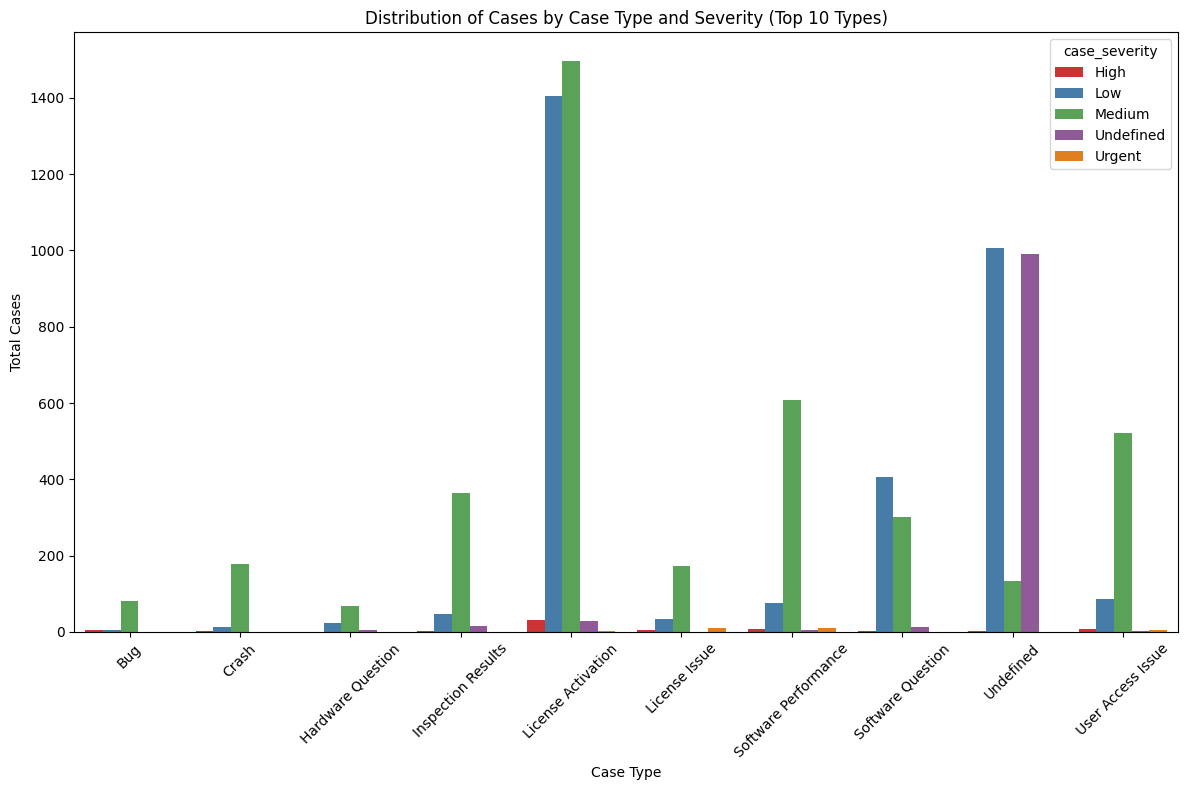

In [312]:
# Group the data by case type and severity to count the number of cases
df_case_type_severity = df_combined.groupby(['case_type', 'case_severity']).size().reset_index(name='total_cases')

# Select the 10 most frequent case types
top_10_case_types = df_case_type_severity.groupby('case_type')['total_cases'].sum().nlargest(10).index
df_top_10_case_type_severity = df_case_type_severity[df_case_type_severity['case_type'].isin(top_10_case_types)]

# Plot the bar chart to visualize the relationship between case type and severity, limited to the top 10 case types
plt.figure(figsize=(12, 8))
sns.barplot(
    data=df_top_10_case_type_severity, 
    x='case_type', 
    y='total_cases', 
    hue='case_severity', 
    palette='Set1'  # Distinct colors for each severity
)

plt.title('Distribution of Cases by Case Type and Severity (Top 10 Types)')
plt.xlabel('Case Type')
plt.ylabel('Total Cases')
plt.xticks(rotation=45)  # To make the labels easier to read
plt.tight_layout()
plt.show()

#### 3.4 - Distribution of Cases by Type of Call and Severity (Top 3 Types)

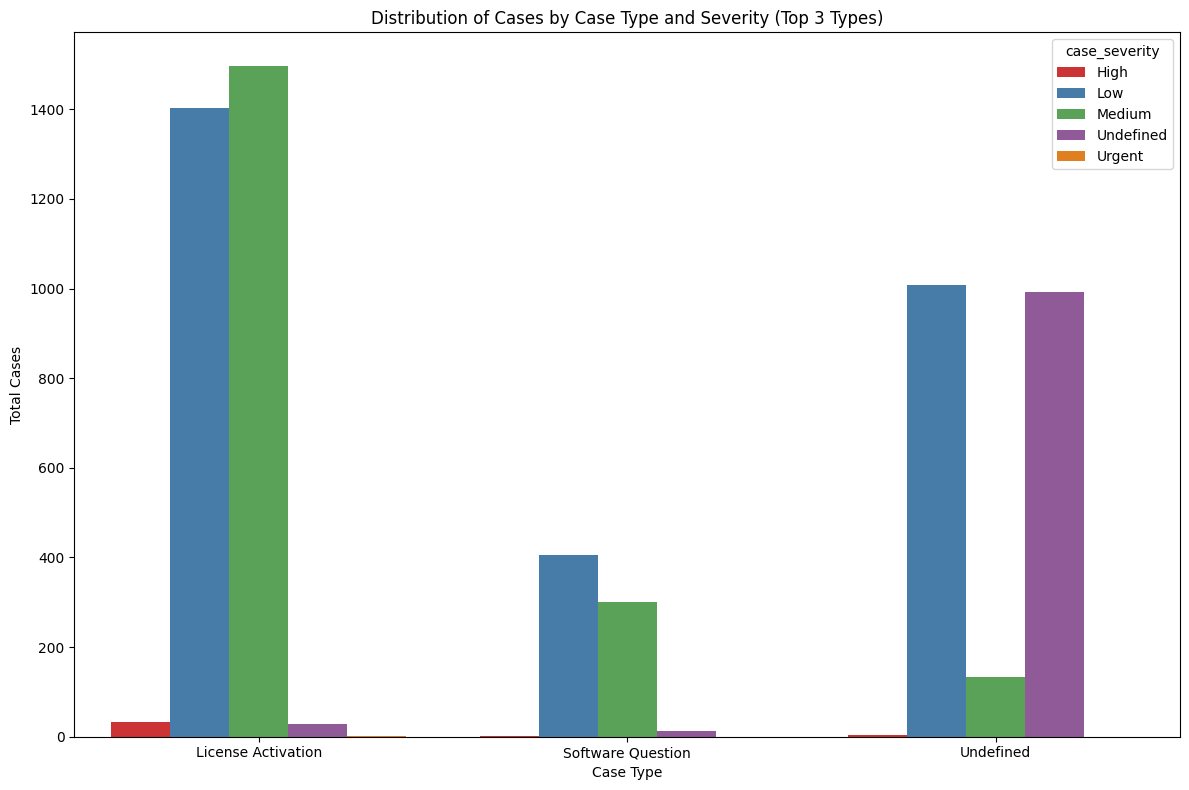

In [313]:
# Group the data by case type and severity to count the number of cases
df_case_type_severity = df_combined.groupby(['case_type', 'case_severity']).size().reset_index(name='total_cases')

# Select the 3 most frequent case types
top_3_case_types = df_case_type_severity.groupby('case_type')['total_cases'].sum().nlargest(3).index
df_top_3_case_type_severity = df_case_type_severity[df_case_type_severity['case_type'].isin(top_3_case_types)]

# Plot the bar chart to visualize the relationship between case type and severity, limited to the top 3 case types
plt.figure(figsize=(12, 8))
sns.barplot(
    data=df_top_3_case_type_severity, 
    x='case_type', 
    y='total_cases', 
    hue='case_severity', 
    palette='Set1'  # Distinct colors for each severity
)

plt.title('Distribution of Cases by Case Type and Severity (Top 3 Types)')
plt.xlabel('Case Type')
plt.ylabel('Total Cases')
plt.tight_layout()
plt.show()

#### 3.5 - Average Resolution Time by Industry

/var/folders/86/t0s56lw963l8hq8z4bszh1j40000gn/T/ipykernel_1026/3338526652.py:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




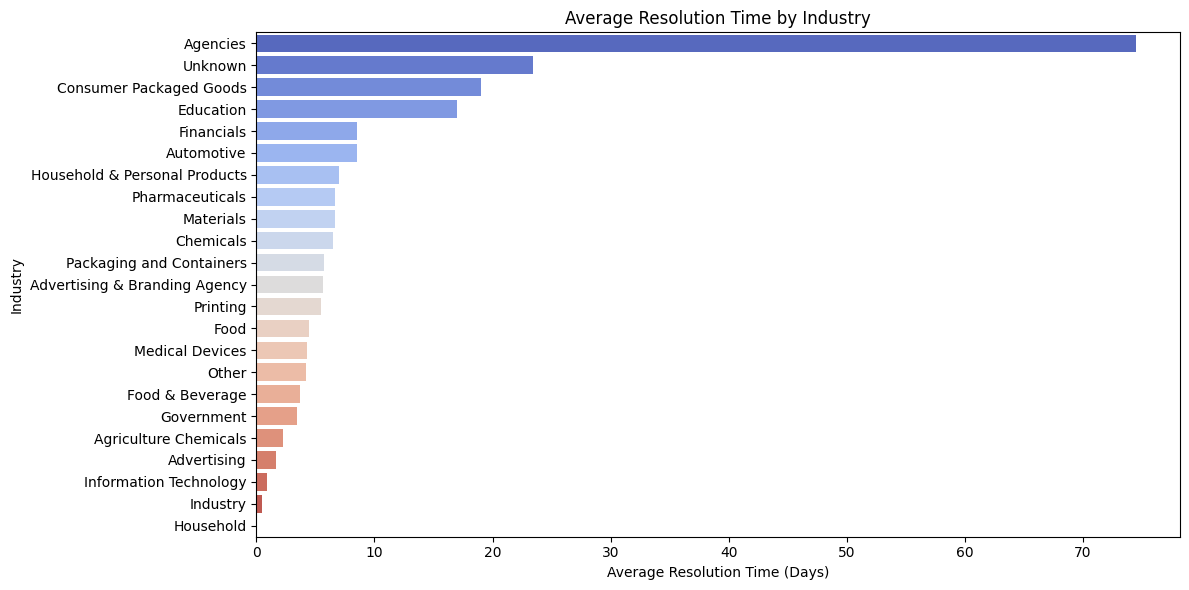

In [314]:
# Ensure that the date columns are of datetime type
df_combined['case_created_date'] = pd.to_datetime(df_combined['case_created_date'])
df_combined['case_closed_date'] = pd.to_datetime(df_combined['case_closed_date'])

# Calculate the resolution time for each case (in days)
df_combined['resolution_time'] = (df_combined['case_closed_date'] - df_combined['case_created_date']).dt.days

# Group the data by industry and calculate the average resolution time for each
df_resolution_by_industry = df_combined.groupby('account_industry')['resolution_time'].mean().reset_index()

# Sort the data by average resolution time in descending order
df_resolution_by_industry = df_resolution_by_industry.sort_values('resolution_time', ascending=False)

# Plot the bar chart to visualize the industries with the highest average resolution time
plt.figure(figsize=(12, 6))
sns.barplot(
    data=df_resolution_by_industry, 
    x='resolution_time', 
    y='account_industry', 
    palette='coolwarm'
)

plt.title('Average Resolution Time by Industry')
plt.xlabel('Average Resolution Time (Days)')
plt.ylabel('Industry')
plt.tight_layout()
plt.show()

In [315]:
# Filtra o DataFrame para as indústrias específicas
industries_of_interest = ['Pharmaceuticals', 'Information Technology', 'Printing']
df_filtered_industries = df_combined[df_combined['account_industry'].isin(industries_of_interest)]

# Calcule o tempo de resolução para cada caso (em dias)
df_filtered_industries['resolution_time'] = (df_filtered_industries['case_closed_date'] - df_filtered_industries['case_created_date']).dt.days

# Agrupe os dados por indústria e calcule o tempo médio de resolução para cada uma
df_resolution_by_industry = df_filtered_industries.groupby('account_industry')['resolution_time'].mean().reset_index()

# Exibe o tempo médio de resolução para cada indústria
print(df_resolution_by_industry)

         account_industry  resolution_time
0  Information Technology         0.897143
1         Pharmaceuticals         6.683312
2                Printing         5.437610


/var/folders/86/t0s56lw963l8hq8z4bszh1j40000gn/T/ipykernel_1026/1450017162.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### 3.5.1 - Average resolution time per year

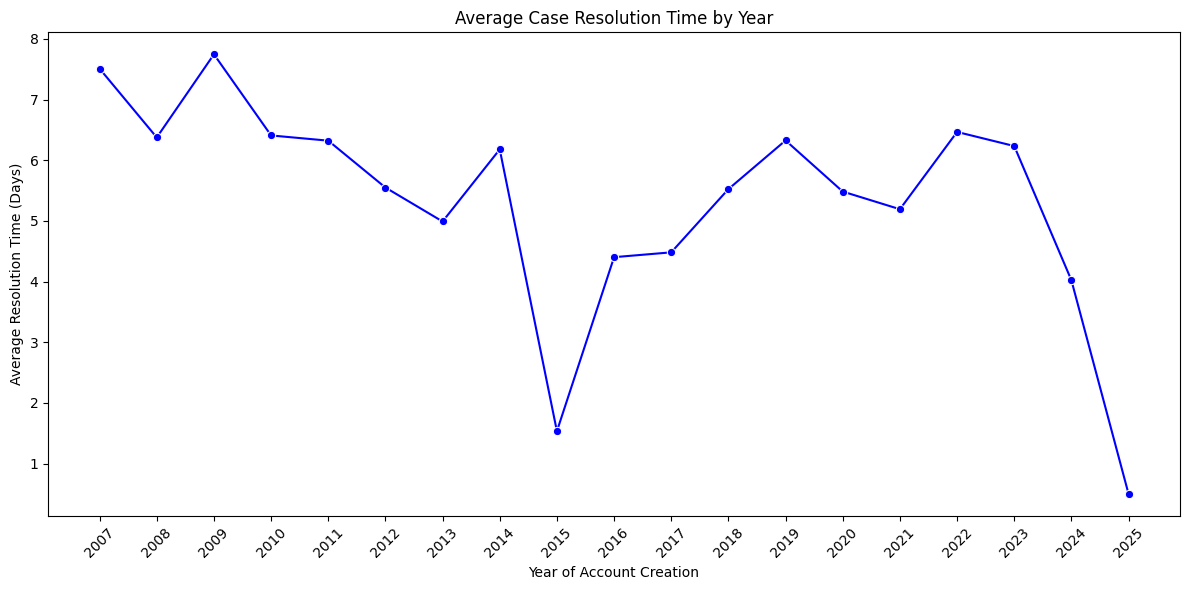

In [316]:
# Ensure the 'case_created_date' and 'case_closed_date' columns are in datetime format
df_support_cases['case_created_date'] = pd.to_datetime(df_support_cases['case_created_date'])
df_support_cases['case_closed_date'] = pd.to_datetime(df_support_cases['case_closed_date'])

# Merge the datasets df_accounts and df_support_cases using 'account_sfid'
df_combined = pd.merge(df_support_cases, df_accounts, on='account_sfid', how='inner')

# Create a new column for the year the account was created
df_combined['year_created'] = df_combined['account_created_date'].dt.year

# Calculate the resolution time for each case (in days)
df_combined['resolution_time'] = (df_combined['case_closed_date'] - df_combined['case_created_date']).dt.days

# Calculate the average resolution time by year of account creation
df_resolution_per_year = df_combined.groupby('year_created')['resolution_time'].mean().reset_index()

# Sort the data to ensure years are displayed in ascending order
df_resolution_per_year = df_resolution_per_year.sort_values('year_created')

# Plot the line chart for the trend of resolution time by year of account creation
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_resolution_per_year, x='year_created', y='resolution_time', marker='o', color='b')

# Customize the X-axis labels to ensure all years are displayed
plt.title('Average Case Resolution Time by Year')
plt.xlabel('Year of Account Creation')
plt.ylabel('Average Resolution Time (Days)')

# Add all years to the X-axis
plt.xticks(df_resolution_per_year['year_created'], rotation=45)

plt.tight_layout()
plt.show()

#### 3.6 - Average Case Resolution Time in the United States by Year of Account Creation

/var/folders/86/t0s56lw963l8hq8z4bszh1j40000gn/T/ipykernel_1026/367580793.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



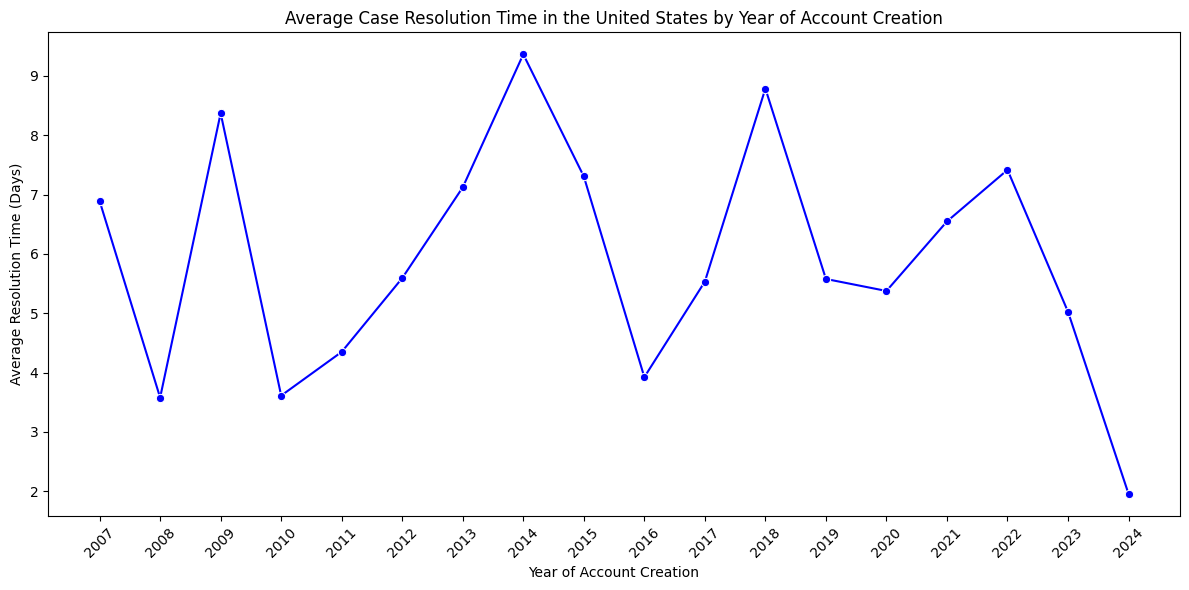

In [317]:
# Ensure the date columns are in datetime format
df_combined['case_created_date'] = pd.to_datetime(df_combined['case_created_date'], errors='coerce')
df_combined['case_closed_date'] = pd.to_datetime(df_combined['case_closed_date'], errors='coerce')

# Filter the data for cases in the United States
df_us_cases = df_combined[df_combined['account_country'] == 'United States']

# Calculate the resolution time for each case (in days)
df_us_cases['resolution_time'] = (df_us_cases['case_closed_date'] - df_us_cases['case_created_date']).dt.days

# Check for null values after the subtraction and remove these cases, as they may have resulted from date conversion errors
df_us_cases = df_us_cases.dropna(subset=['resolution_time'])

# Extract the account creation year
df_us_cases['year_created'] = df_us_cases['account_created_date'].dt.year

# Group the data by account creation year and calculate the average resolution time
df_resolution_per_year_us = df_us_cases.groupby('year_created')['resolution_time'].mean().reset_index()

# Plot the line chart for resolution time in the United States over the years of account creation
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_resolution_per_year_us, x='year_created', y='resolution_time', marker='o', color='b')

# Add all years to the X-axis with a 1-year interval
plt.xticks(df_resolution_per_year_us['year_created'], rotation=45)

plt.title('Average Case Resolution Time in the United States by Year of Account Creation')
plt.xlabel('Year of Account Creation')
plt.ylabel('Average Resolution Time (Days)')
plt.tight_layout()
plt.show()

#### 3.7 - Countries with longer resolution times

/var/folders/86/t0s56lw963l8hq8z4bszh1j40000gn/T/ipykernel_1026/3046387833.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




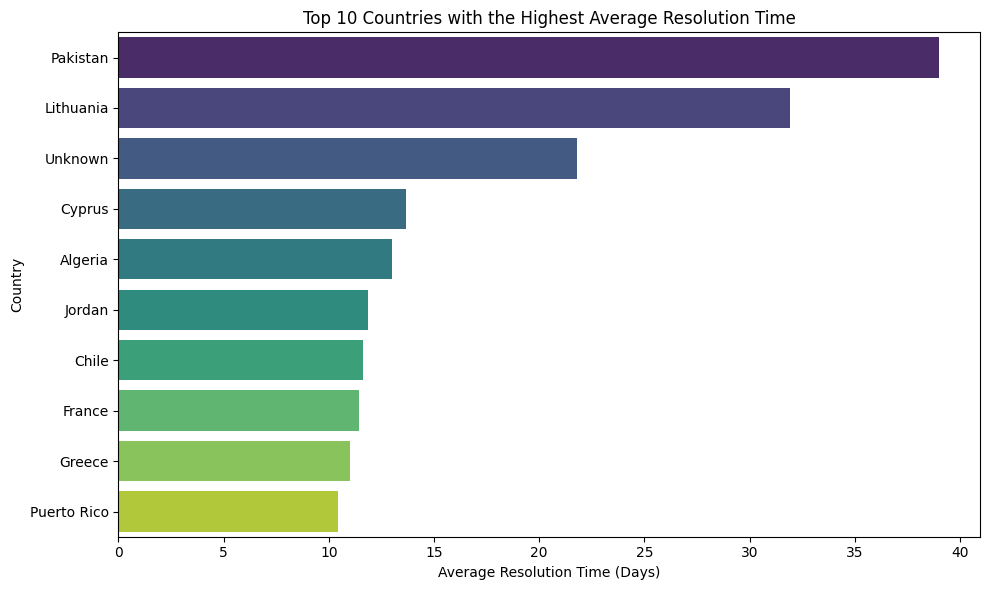

In [318]:
# Sort the DataFrame by average resolution time
df_time_per_country = df_time_per_country.sort_values("avg_resolution_days", ascending=False)

# Ensure we limit the visualization to the top 10 countries if necessary
df_top10_time_country = df_time_per_country.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_top10_time_country, 
    x="avg_resolution_days", 
    y="account_country", 
    palette="viridis"
)

plt.title("Top 10 Countries with the Highest Average Resolution Time")
plt.xlabel("Average Resolution Time (Days)")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

#### 3.7.1 - Distribution of Cases by Severity in Countries with Longer Case Resolution Time

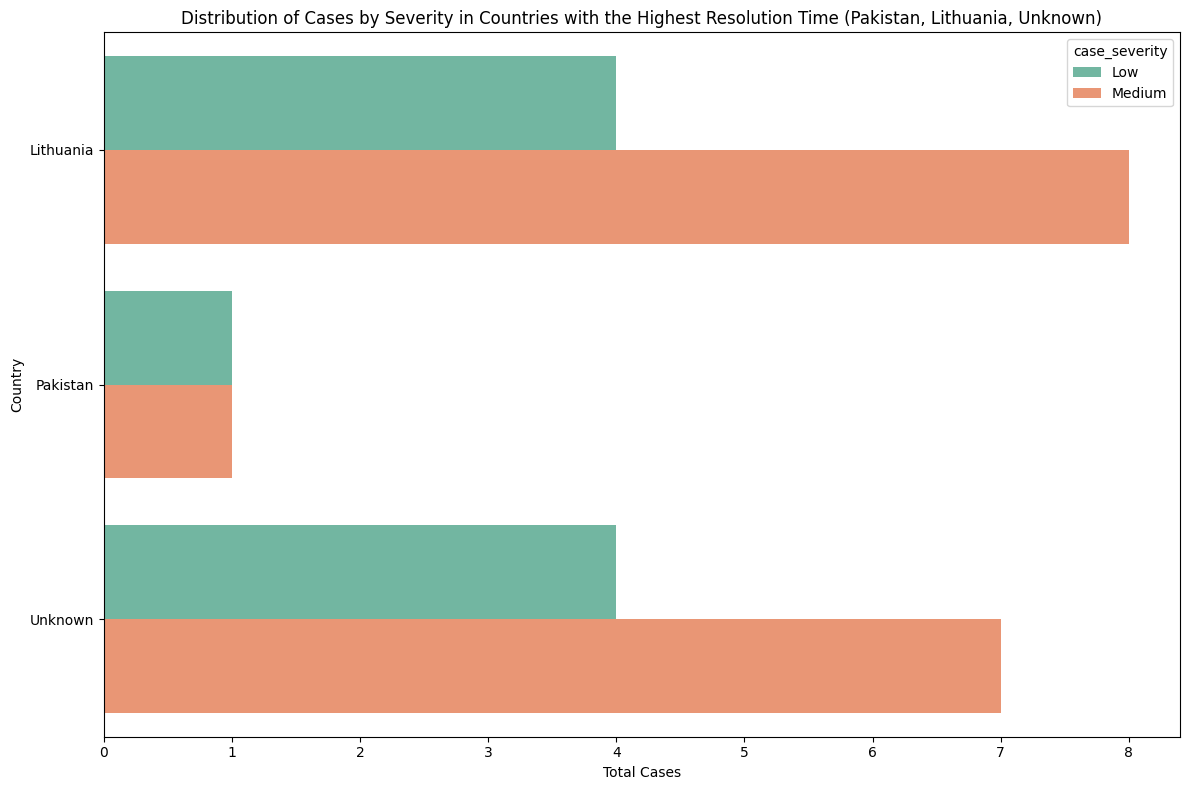

In [319]:
# Filter the data for countries with the highest average resolution time
df_filtered_countries = df_combined[df_combined['account_country'].isin(['Pakistan', 'Lithuania', 'Unknown'])]

# Group the data by country and severity to count the cases
df_severity_by_country = df_filtered_countries.groupby(['account_country', 'case_severity']).size().reset_index(name='total_cases')

# Plot the bar chart to visualize the severity distribution
plt.figure(figsize=(12, 8))
sns.barplot(
    data=df_severity_by_country, 
    x='total_cases', 
    y='account_country', 
    hue='case_severity', 
    palette='Set2'  # Distinct colors for severities
)

plt.title("Distribution of Cases by Severity in Countries with the Highest Resolution Time (Pakistan, Lithuania, Unknown)")
plt.xlabel("Total Cases")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

#### 3.8 - Top 10 Accounts with the Longest Average Resolution Time

/var/folders/86/t0s56lw963l8hq8z4bszh1j40000gn/T/ipykernel_1026/3724145151.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




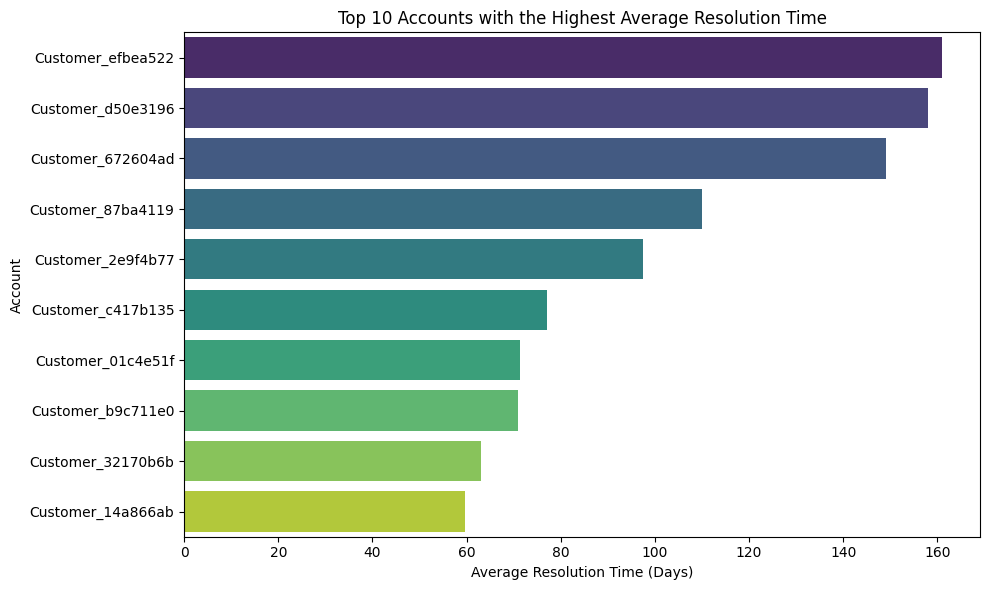

In [320]:
# Sort the DataFrame from the highest to the lowest average resolution time
df_time_resolution = df_time_resolution.sort_values("avg_resolution_days", ascending=False)

# Select only the top 10 accounts with the highest average resolution time
df_top10_time_resolution = df_time_resolution.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_top10_time_resolution, 
    x="avg_resolution_days", 
    y="account_name", 
    palette="viridis"
)

plt.title("Top 10 Accounts with the Highest Average Resolution Time")
plt.xlabel("Average Resolution Time (Days)")
plt.ylabel("Account")
plt.tight_layout()
plt.show()

#### 3.9 - Evolution of Accounts Created by Month and Year

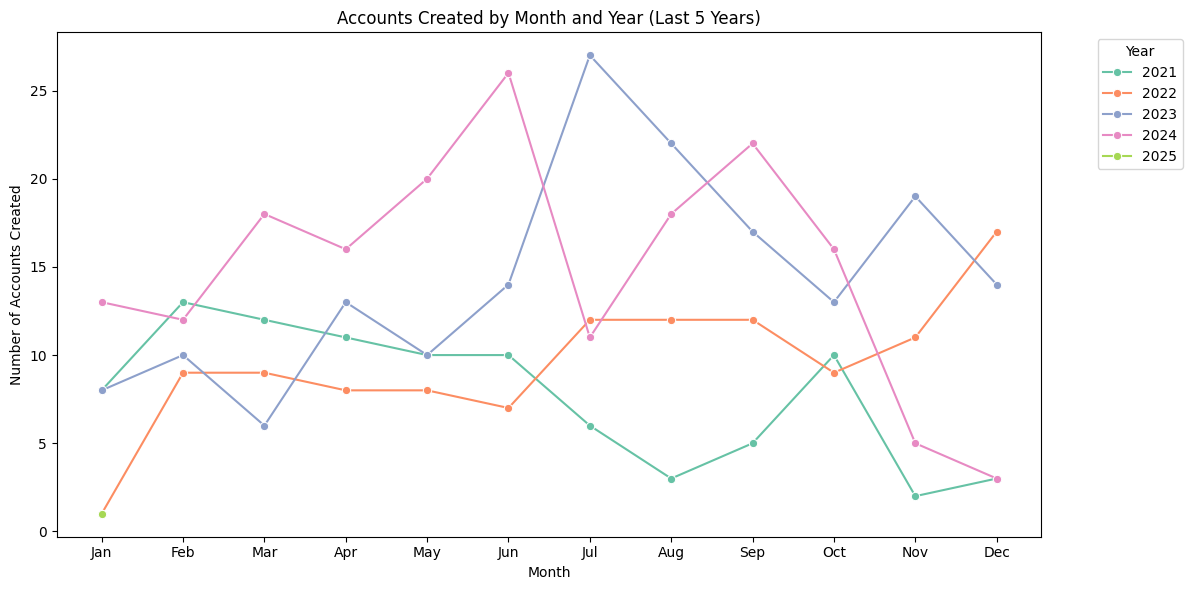

In [321]:
# Ensure the 'account_created_date' column is in datetime format
df_accounts['account_created_date'] = pd.to_datetime(df_accounts['account_created_date'])

# Create new columns for 'year' and 'month'
df_accounts['year_created'] = df_accounts['account_created_date'].dt.year
df_accounts['month_created'] = df_accounts['account_created_date'].dt.month

# Filter for the last 5 years
recent_years = df_accounts['year_created'].max()  # Latest year in the data
df_accounts_filtered = df_accounts[df_accounts['year_created'] >= recent_years - 4]

# Count accounts by month and year
df_month_year = df_accounts_filtered.groupby(['year_created', 'month_created']).size().reset_index(name='total_accounts')

# Plot the line chart with distinct colors for each year
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_month_year, x='month_created', y='total_accounts', hue='year_created', palette='Set2', marker='o')

plt.title('Accounts Created by Month and Year (Last 5 Years)')
plt.xlabel('Month')
plt.ylabel('Number of Accounts Created')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#### 3.10 - Number of cases by accounts (Top 5)

/var/folders/86/t0s56lw963l8hq8z4bszh1j40000gn/T/ipykernel_1026/622147014.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




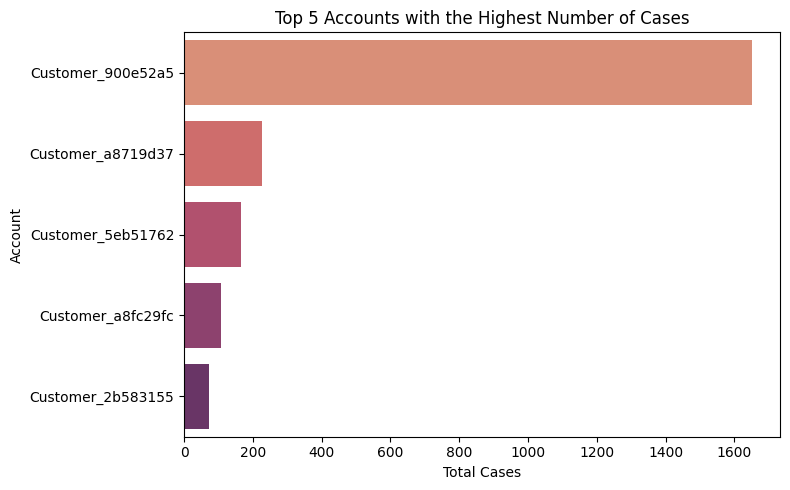

In [322]:
# Ensure descending order
df_cases_account = df_cases_account.sort_values("total_cases", ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(
    data=df_cases_account, 
    x="total_cases", 
    y="account_name", 
    palette="flare"
)

plt.title("Top 5 Accounts with the Highest Number of Cases")
plt.xlabel("Total Cases")
plt.ylabel("Account")
plt.tight_layout()
plt.show()

In [323]:
# Filter the cases for the account Customer_900e52a5
df_customer_900e52a5 = df_combined[df_combined['account_name'] == 'Customer_900e52a5']

# Display the first information about the cases for this account
print("Information about the account Customer_900e52a5:")
print(f"Total Cases: {df_customer_900e52a5.shape[0]}")
print(f"Country: {df_customer_900e52a5['account_country'].iloc[0]}")
print(f"Industry: {df_customer_900e52a5['account_industry'].iloc[0]}")
print(f"Year Created: {df_customer_900e52a5['account_created_date'].iloc[0]}")

# Display the details of the cases for this account
print("\nCase Details:")
print(df_customer_900e52a5[['case_sfid', 'case_status', 'case_priority', 'case_severity', 'case_type', 'case_category', 'case_created_date', 'case_closed_date']].head())

# Display statistics about resolution times for this account
df_customer_900e52a5['resolution_time'] = (df_customer_900e52a5['case_closed_date'] - df_customer_900e52a5['case_created_date']).dt.days
print(f"\nAverage resolution time for this account: {df_customer_900e52a5['resolution_time'].mean()} days")

Information about the account Customer_900e52a5:
Total Cases: 1650
Country: Canada
Industry: Information Technology
Year Created: 2015-10-06 13:16:56

Case Details:
                                            case_sfid          case_status  \
23  7ac20ac15acb77535ba18a7b2c293e840c268ba9fce4fe...            Duplicate   
24  204aac3b7619c5206b906e50fce23b3b6f8cbf47e0bb01...               Closed   
38  dec143ba96a16657a782f79092d9f7f3ccc52c4d290c09...  Waiting On Customer   
40  4ee06912b582a91627a3c08d4a47b69b885a0179d02efe...               Closed   
44  5e3b8eaf4f076f8ceb703c92d7bc10fab58909b7c8d4c8...               Closed   

   case_priority case_severity          case_type case_category  \
23        Normal     Undefined          Undefined     Undefined   
24        Normal           Low          Undefined     Undefined   
38        Normal        Medium  User Access Issue     Licensing   
40        Normal           Low          Undefined     Undefined   
44        Normal           Low 

/var/folders/86/t0s56lw963l8hq8z4bszh1j40000gn/T/ipykernel_1026/1863368967.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Section 4 - Performance and Trend Analysis

#### 4.1 - Resolution Time Trend (Average, Maximum, Minimum)

In [324]:
# Merge the datasets df_accounts and df_support_cases using 'account_sfid'
df_combined = pd.merge(df_support_cases, df_accounts, on='account_sfid', how='inner')

# Ensure the date columns are in datetime format
df_combined['case_created_date'] = pd.to_datetime(df_combined['case_created_date'], errors='coerce')
df_combined['case_closed_date'] = pd.to_datetime(df_combined['case_closed_date'], errors='coerce')

# Filter the data for cases in the United States
df_us_cases = df_combined[df_combined['account_country'] == 'United States']

# Calculate the resolution time for each case (in days)
df_us_cases['resolution_time'] = (df_us_cases['case_closed_date'] - df_us_cases['case_created_date']).dt.days

# Remove rows with null values in the 'resolution_time' column, if any
df_us_cases = df_us_cases.dropna(subset=['resolution_time'])

# Extract the account creation year
df_us_cases['year_created'] = df_us_cases['account_created_date'].dt.year

# Group the data by account creation year and calculate the mean, min, and max resolution time
df_resolution_stats = df_us_cases.groupby('year_created')['resolution_time'].agg(['mean', 'min', 'max']).reset_index()

# Create future predictions (Linear Regression)
X = df_resolution_stats['year_created'].values.reshape(-1, 1)
y = df_resolution_stats['mean'].values
model = LinearRegression().fit(X, y)
future_years = np.arange(df_resolution_stats['year_created'].max(), df_resolution_stats['year_created'].max() + 5).reshape(-1, 1)
future_predictions = model.predict(future_years)

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot 1: Resolution Time Trend for the Future (Prediction)
axes[0].plot(df_resolution_stats['year_created'], df_resolution_stats['mean'], label='Actual Mean', color='b')
axes[0].plot(future_years, future_predictions, label='Prediction', linestyle='--', color='r')
axes[0].set_title('Resolution Time Trend for the Future')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Average Resolution Time (Days)')
axes[0].legend()

# Plot 2: Average Resolution Time
axes[1].plot(df_resolution_stats['year_created'], df_resolution_stats['mean'], marker='o', color='g')
axes[1].set_title('Average Resolution Time')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Average Resolution Time (Days)')

# Plot 3: Min and Max Resolution Time
axes[2].plot(df_resolution_stats['year_created'], df_resolution_stats['min'], marker='o', label='Min', color='orange')
axes[2].plot(df_resolution_stats['year_created'], df_resolution_stats['max'], marker='o', label='Max', color='red')
axes[2].set_title('Min and Max Resolution Time')
axes[2].set_xlabel('Year')
axes[2].set_ylabel('Resolution Time (Days)')
axes[2].legend()

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

/var/folders/86/t0s56lw963l8hq8z4bszh1j40000gn/T/ipykernel_1026/3522847732.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



NameError: name 'LinearRegression' is not defined

#### 4.2 - Severity by cases

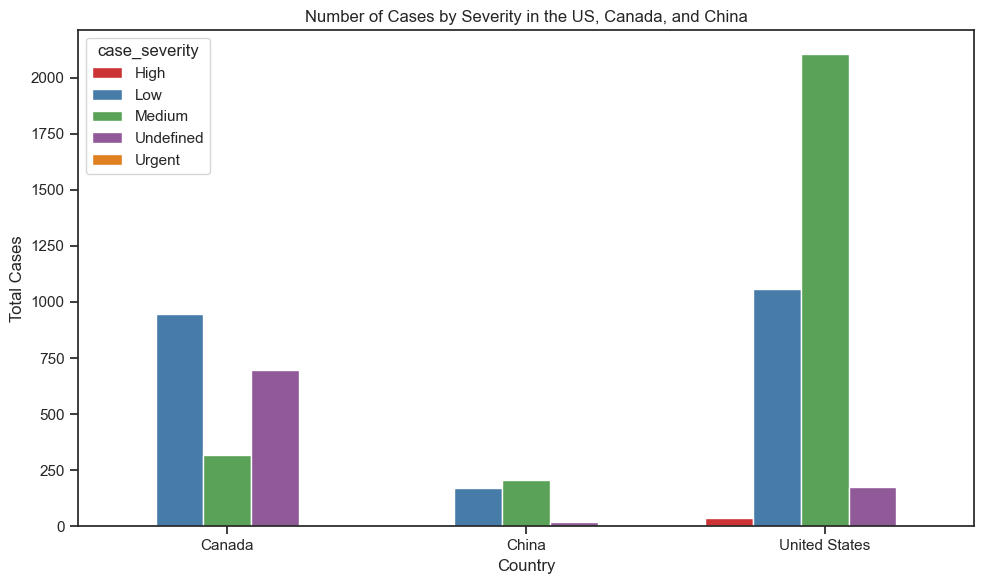

In [235]:
# Merge the datasets df_accounts and df_support_cases using 'account_sfid'
df_combined = pd.merge(df_support_cases, df_accounts, on='account_sfid', how='inner')

# Filter the data to include only the countries of interest
df_filtered = df_combined[df_combined['account_country'].isin(['United States', 'Canada', 'China'])]

# Group the data by country and severity to count the cases
df_severity_by_country = df_filtered.groupby(['account_country', 'case_severity']).size().reset_index(name='total_cases')

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_severity_by_country, 
    x='account_country', 
    y='total_cases', 
    hue='case_severity', 
    palette="Set1"
)

plt.title('Number of Cases by Severity in the US, Canada, and China')
plt.xlabel('Country')
plt.ylabel('Total Cases')
plt.tight_layout()
plt.show()

#### 4.3 Distribution of Cases by Country for the Top 3 Industries

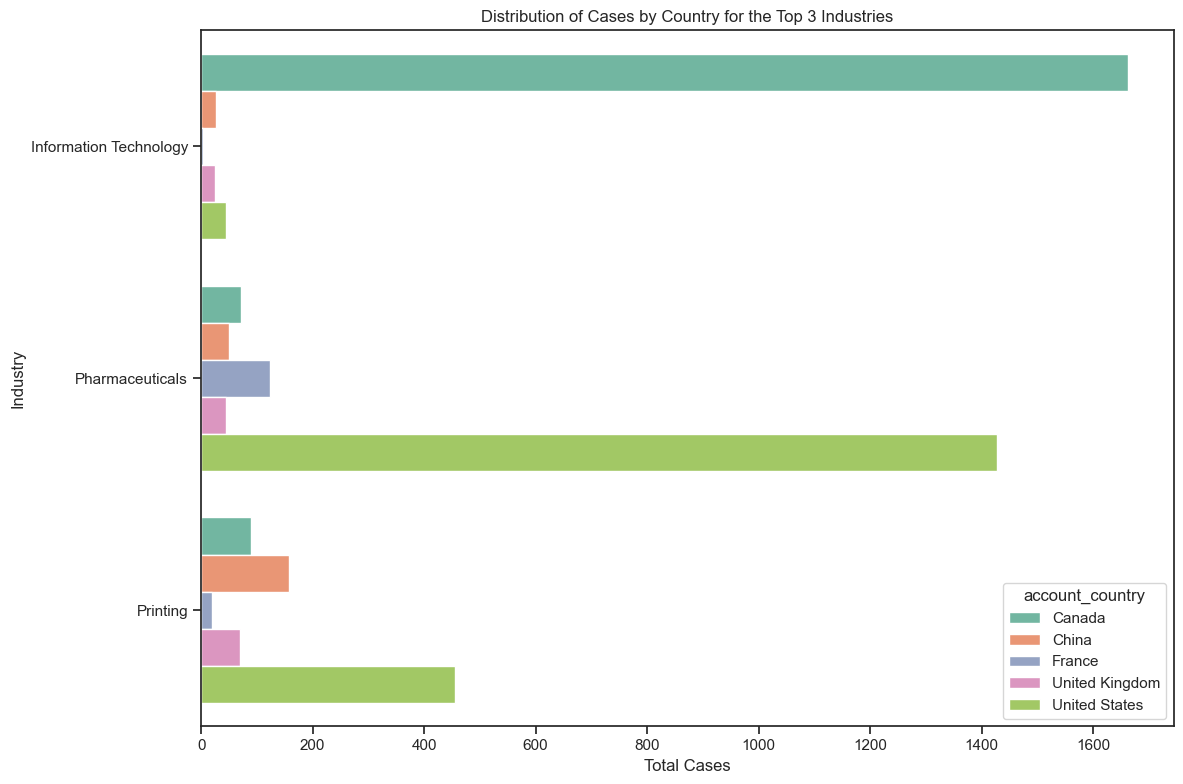

In [236]:
# Sort the DataFrame to find the top 3 industries with the most cases
df_cases_industry = df_cases_industry.sort_values("total_cases", ascending=False)

# Select the top 3 industries with the most cases
df_top3_industries = df_cases_industry.head(3)

# Filter the data for these industries
df_filtered_industries = df_combined[df_combined['account_industry'].isin(df_top3_industries['account_industry'])]

# Group the data by industry and country to count the cases
df_cases_by_industry_country = df_filtered_industries.groupby(['account_industry', 'account_country']).size().reset_index(name='total_cases')

# Select the top 5 countries with the highest number of cases in the selected industries
top5_countries = df_cases_by_industry_country.groupby('account_country')['total_cases'].sum().nlargest(5).index
df_top5_cases = df_cases_by_industry_country[df_cases_by_industry_country['account_country'].isin(top5_countries)]

# Plot the bar chart for the 5 most affected countries by cases in the top 3 industries
plt.figure(figsize=(12, 8))
sns.barplot(
    data=df_top5_cases, 
    x='total_cases', 
    y='account_industry', 
    hue='account_country', 
    palette='Set2'  # Distinct colors for the countries
)

plt.title("Distribution of Cases by Country for the Top 3 Industries")
plt.xlabel("Total Cases")
plt.ylabel("Industry")
plt.tight_layout()
plt.show()

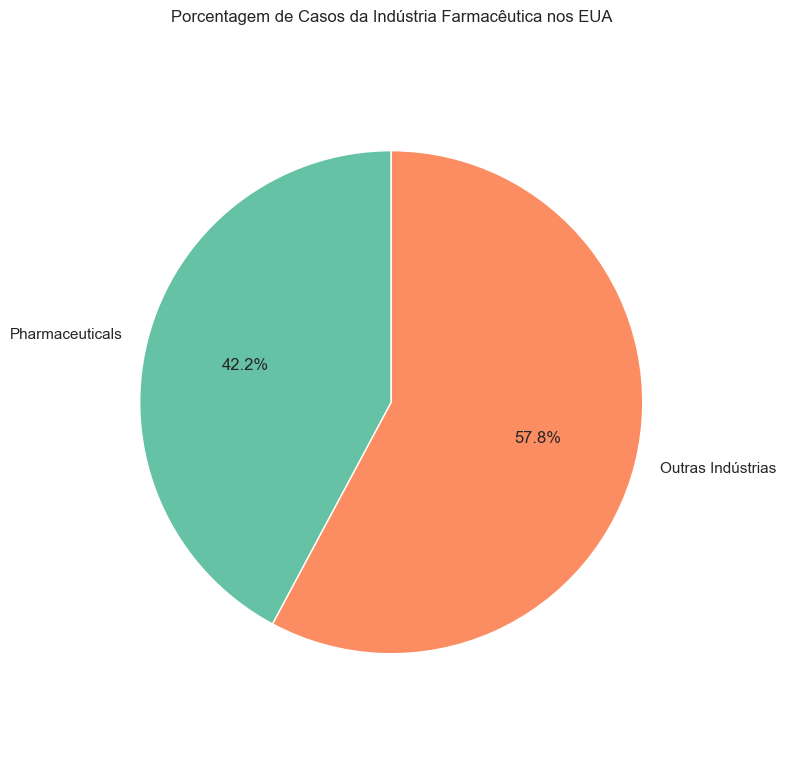

In [190]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtra os dados para os casos dos Estados Unidos
df_us_cases = df_combined[df_combined['account_country'] == 'United States']

# Filtra os casos relacionados à indústria farmacêutica
df_pharma_cases = df_us_cases[df_us_cases['account_industry'] == 'Pharmaceuticals']

# Conta o número de casos na indústria farmacêutica e o total de casos
total_cases_us = df_us_cases.shape[0]
pharma_cases = df_pharma_cases.shape[0]

# Calcula a porcentagem
pharma_percentage = (pharma_cases / total_cases_us) * 100

# Cria os dados para o gráfico de pizza
labels = ['Pharmaceuticals', 'Outras Indústrias']
sizes = [pharma_percentage, 100 - pharma_percentage]
colors = sns.color_palette("Set2", n_colors=2)

# Plotando o gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Porcentagem de Casos da Indústria Farmacêutica nos EUA')
plt.axis('equal')  # Garante que o gráfico seja um círculo perfeito
plt.tight_layout()
plt.show()

#### 4.4 - Average, maximum and minimum resolutions of US cases with 5 most present industries

/var/folders/86/t0s56lw963l8hq8z4bszh1j40000gn/T/ipykernel_1021/3124023402.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



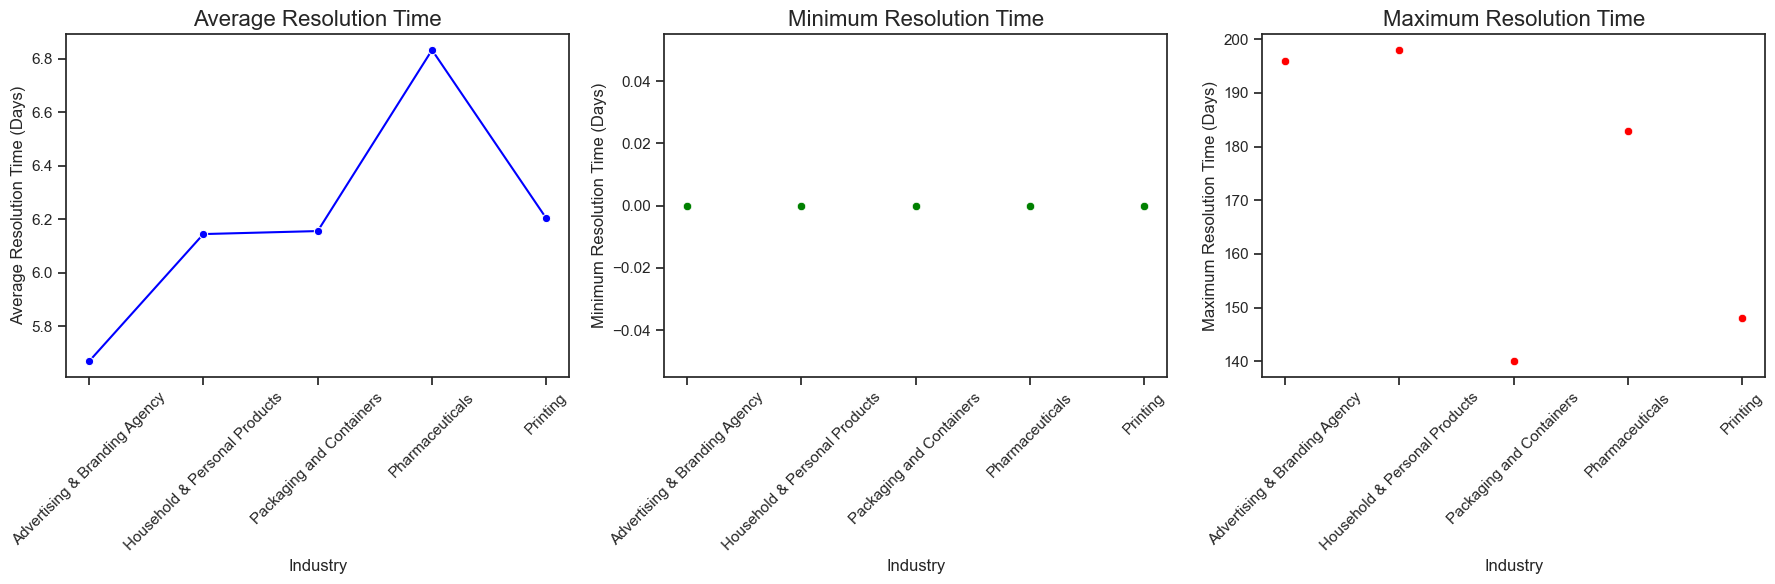

In [237]:
# Filter the data for cases in the United States
df_us_cases = df_combined[df_combined['account_country'] == 'United States']

# Calculate the resolution time for each case (in days)
df_us_cases['resolution_time'] = (df_us_cases['case_closed_date'] - df_us_cases['case_created_date']).dt.days

# Group the data by industry and count the number of cases per industry
industry_counts = df_us_cases['account_industry'].value_counts().head(5).index

# Filter the data to include only the top 5 industries
df_us_cases_top5_industries = df_us_cases[df_us_cases['account_industry'].isin(industry_counts)]

# Group the data by industry and calculate the average, minimum, and maximum resolution time
df_resolution_stats_us = df_us_cases_top5_industries.groupby('account_industry')['resolution_time'].agg(['mean', 'min', 'max']).reset_index()

# Create subplots for each chart
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # Layout set to 1x3

# Line chart for average resolution time
sns.lineplot(data=df_resolution_stats_us, x='account_industry', y='mean', ax=axes[0], marker='o', color='blue')
axes[0].set_title('Average Resolution Time', fontsize=16)
axes[0].set_xlabel('Industry', fontsize=12)
axes[0].set_ylabel('Average Resolution Time (Days)', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)

# Scatter plot for minimum resolution time
sns.scatterplot(data=df_resolution_stats_us, x='account_industry', y='min', ax=axes[1], color='green')
axes[1].set_title('Minimum Resolution Time', fontsize=16)
axes[1].set_xlabel('Industry', fontsize=12)
axes[1].set_ylabel('Minimum Resolution Time (Days)', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)

# Scatter plot for maximum resolution time
sns.scatterplot(data=df_resolution_stats_us, x='account_industry', y='max', ax=axes[2], color='red')
axes[2].set_title('Maximum Resolution Time', fontsize=16)
axes[2].set_xlabel('Industry', fontsize=12)
axes[2].set_ylabel('Maximum Resolution Time (Days)', fontsize=12)
axes[2].tick_params(axis='x', rotation=45)

# Adjust layout to ensure all charts fit correctly
plt.tight_layout()
plt.show()

#### 4.5 - Account creation trend until 2030

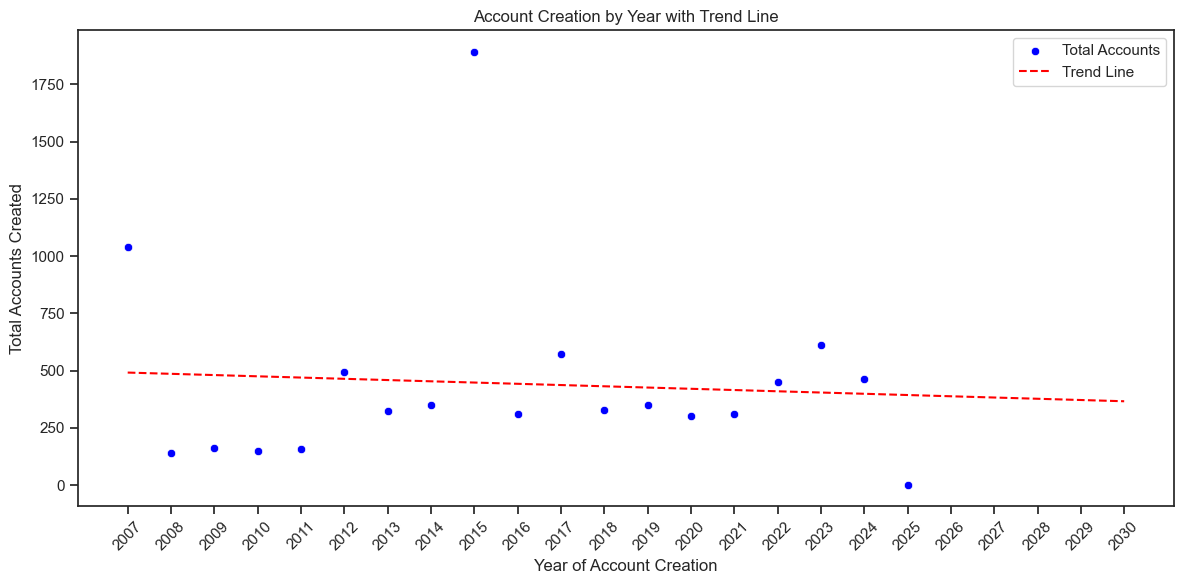

In [238]:
# Ensure the account creation date column is in datetime format
df_combined['account_created_date'] = pd.to_datetime(df_combined['account_created_date'], errors='coerce')

# Extract the account creation year
df_combined['year_created'] = df_combined['account_created_date'].dt.year

# Group by account creation year and count the number of accounts created per year
df_creation_by_year = df_combined.groupby('year_created').size().reset_index(name='total_accounts')

# Perform linear regression to add a trend line
X = df_creation_by_year['year_created'].values.reshape(-1, 1)
y = df_creation_by_year['total_accounts'].values
model = LinearRegression().fit(X, y)

# Generate future years up to 2030
future_years = np.arange(df_creation_by_year['year_created'].min(), 2031, 1).reshape(-1, 1)

# Predictions for future years
future_predictions = model.predict(future_years)

# Create a scatter plot with the trend line
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_creation_by_year, x='year_created', y='total_accounts', color='blue', label='Total Accounts')

# Add the trend line (for both real data and future years)
plt.plot(future_years, future_predictions, color='red', linestyle='--', label='Trend Line')

# Adjust ticks to show all years continuously up to 2030
plt.xticks(np.arange(df_creation_by_year['year_created'].min(), 2031, 1), rotation=45)

plt.title('Account Creation by Year with Trend Line')
plt.xlabel('Year of Account Creation')
plt.ylabel('Total Accounts Created')
plt.legend()
plt.tight_layout()
plt.show()

## Section 5 - Analysis by countries with the most accounts (USA, CHINA, CANADA)

#### USA

/var/folders/86/t0s56lw963l8hq8z4bszh1j40000gn/T/ipykernel_1021/2471109620.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/86/t0s56lw963l8hq8z4bszh1j40000gn/T/ipykernel_1021/2471109620.py:25: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/86/t0s56lw963l8hq8z4bszh1j40000gn/T/ipykernel_1021/2471109620.py:38: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same 

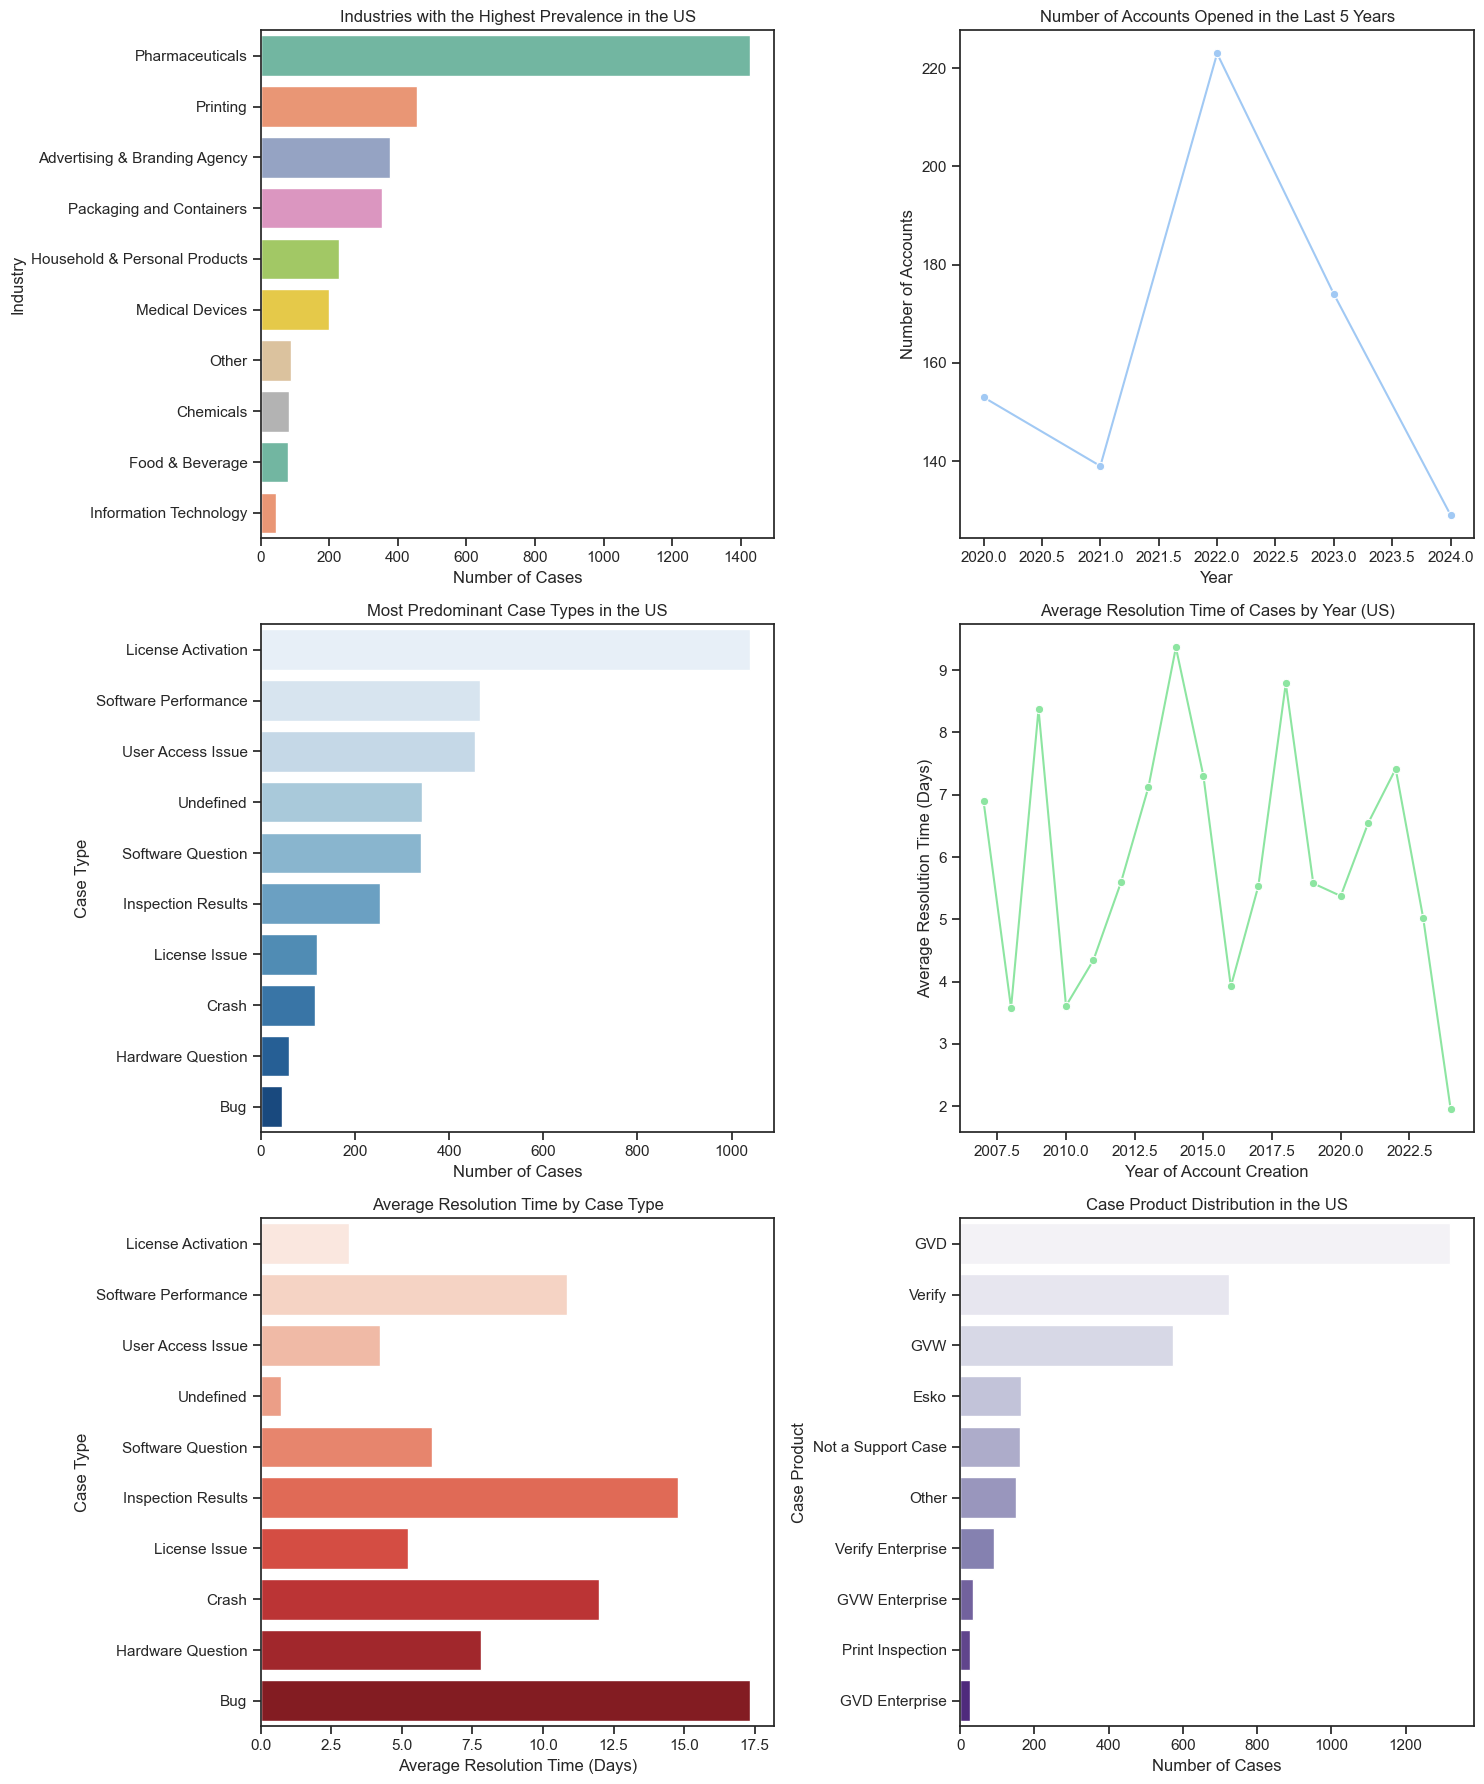

In [239]:
# Filter the data for cases in the United States
df_us_cases = df_combined[df_combined['account_country'] == 'United States']

# Calculate the resolution time for each case (in days)
df_us_cases['resolution_time'] = (df_us_cases['case_closed_date'] - df_us_cases['case_created_date']).dt.days

# Group the data by industry and count the number of cases per industry
industry_counts_us = df_us_cases['account_industry'].value_counts().head(10)

# Count accounts opened in the last 5 years
current_year = pd.to_datetime("today").year
df_us_accounts_last_5 = df_us_cases[df_us_cases['account_created_date'].dt.year >= (current_year - 5)]
account_counts_last_5 = df_us_accounts_last_5['account_created_date'].dt.year.value_counts().sort_index()

# Most predominant case types
case_type_counts_us = df_us_cases['case_type'].value_counts().head(10)

# Average resolution time of cases by industry
avg_resolution_time = df_us_cases.groupby('account_industry')['resolution_time'].mean().sort_values(ascending=False).head(10)

# Distribution of case products
case_product_counts_us = df_us_cases['case_product'].value_counts().head(10)

# Average resolution time of cases by year
df_us_cases['year_created'] = df_us_cases['account_created_date'].dt.year
df_resolution_per_year_us = df_us_cases.groupby('year_created')['resolution_time'].mean().reset_index()

# Select the 10 most predominant case types
top_case_types = case_type_counts_us.index

# Calculate the average resolution time for the 10 most predominant case types
avg_resolution_by_case_type = df_us_cases[df_us_cases['case_type'].isin(top_case_types)].groupby('case_type')['resolution_time'].mean().loc[top_case_types]

# Create subplots for all the charts
fig, axes = plt.subplots(3, 2, figsize=(15, 18))

# Chart 1: Industries with the highest prevalence in the US
sns.barplot(x=industry_counts_us.values, y=industry_counts_us.index, ax=axes[0, 0], palette='Set2')
axes[0, 0].set_title('Industries with the Highest Prevalence in the US')
axes[0, 0].set_xlabel('Number of Cases')
axes[0, 0].set_ylabel('Industry')

# Chart 2: Number of accounts opened in the last 5 years
sns.lineplot(data=account_counts_last_5.sort_index(), ax=axes[0, 1], marker='o', color='b')
axes[0, 1].set_title('Number of Accounts Opened in the Last 5 Years')
axes[0, 1].set_xlabel('Year')
axes[0, 1].set_ylabel('Number of Accounts')

# Chart 3: Most predominant case types
sns.barplot(x=case_type_counts_us.values, y=case_type_counts_us.index, ax=axes[1, 0], palette='Blues')
axes[1, 0].set_title('Most Predominant Case Types in the US')
axes[1, 0].set_xlabel('Number of Cases')
axes[1, 0].set_ylabel('Case Type')

# Chart 4: Average resolution time of cases by year (US)
sns.lineplot(data=df_resolution_per_year_us, x='year_created', y='resolution_time', marker='o', color='g', ax=axes[1, 1])
axes[1, 1].set_title('Average Resolution Time of Cases by Year (US)')
axes[1, 1].set_xlabel('Year of Account Creation')
axes[1, 1].set_ylabel('Average Resolution Time (Days)')

# Chart 5: Average resolution time by predominant case types
sns.barplot(x=avg_resolution_by_case_type.values, y=avg_resolution_by_case_type.index, ax=axes[2, 0], palette='Reds')
axes[2, 0].set_title('Average Resolution Time by Case Type')
axes[2, 0].set_xlabel('Average Resolution Time (Days)')
axes[2, 0].set_ylabel('Case Type')

# Chart 6: Distribution of Case Product
sns.barplot(x=case_product_counts_us.values, y=case_product_counts_us.index, ax=axes[2, 1], palette='Purples')
axes[2, 1].set_title('Case Product Distribution in the US')
axes[2, 1].set_xlabel('Number of Cases')
axes[2, 1].set_ylabel('Case Product')

# Adjust layout to ensure all charts fit correctly
plt.tight_layout()
plt.show()

/var/folders/86/t0s56lw963l8hq8z4bszh1j40000gn/T/ipykernel_1021/1998823631.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/86/t0s56lw963l8hq8z4bszh1j40000gn/T/ipykernel_1021/1998823631.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/86/t0s56lw963l8hq8z4bszh1j40000gn/T/ipykernel_1021/1998823631.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

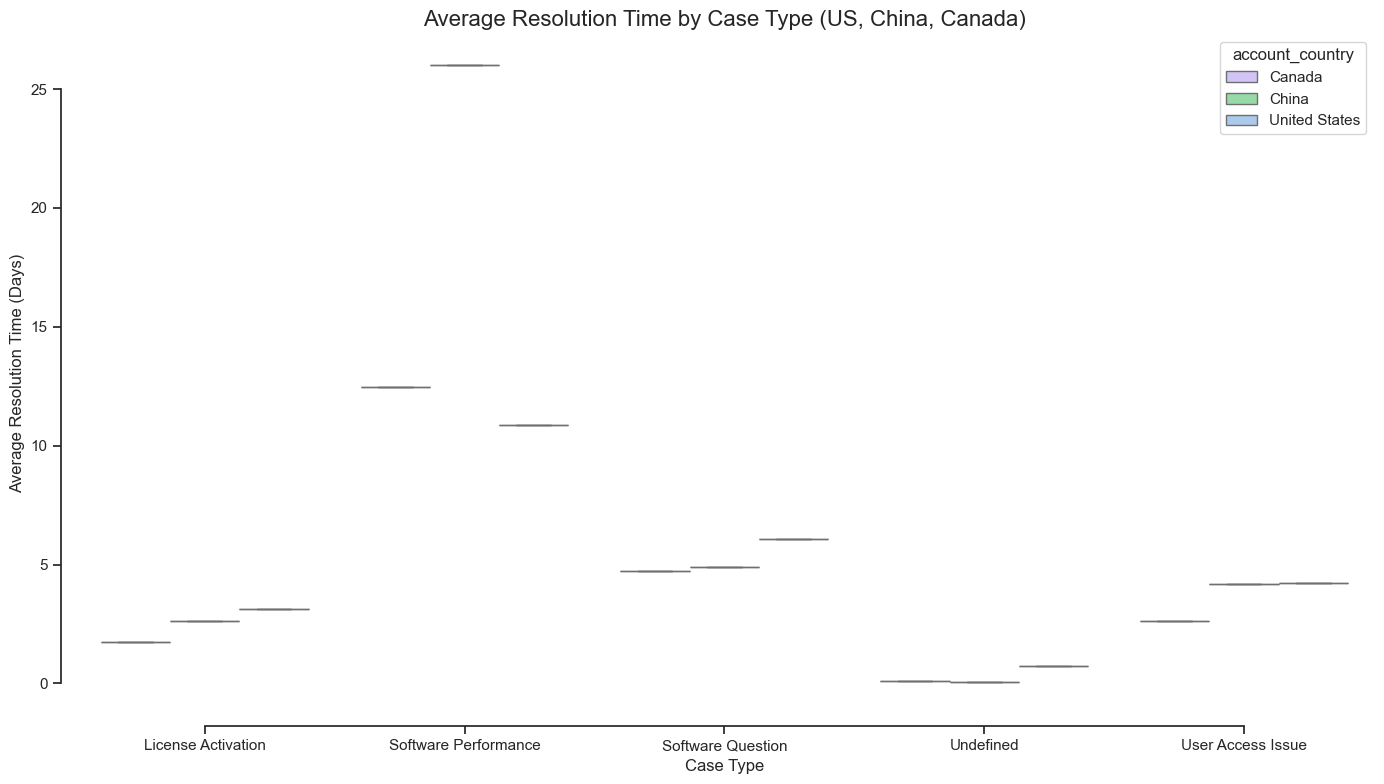

In [240]:
# Filter the data for cases in the United States, China, and Canada
df_us_cases = df_combined[df_combined['account_country'] == 'United States']
df_china_cases = df_combined[df_combined['account_country'] == 'China']
df_canada_cases = df_combined[df_combined['account_country'] == 'Canada']

# Calculate the resolution time for each case (in days)
df_us_cases['resolution_time'] = (df_us_cases['case_closed_date'] - df_us_cases['case_created_date']).dt.days
df_china_cases['resolution_time'] = (df_china_cases['case_closed_date'] - df_china_cases['case_created_date']).dt.days
df_canada_cases['resolution_time'] = (df_canada_cases['case_closed_date'] - df_canada_cases['case_created_date']).dt.days

# Add a column 'account_country' in each DataFrame to distinguish countries
df_us_cases['account_country'] = 'United States'
df_china_cases['account_country'] = 'China'
df_canada_cases['account_country'] = 'Canada'

# Combine the three DataFrames for analysis
df_combined_countries = pd.concat([df_us_cases, df_china_cases, df_canada_cases])

# Select the top 5 most frequent case types
top_5_case_types = df_combined_countries['case_type'].value_counts().head(5).index

# Filter the data to include only the top 5 most frequent case types
df_filtered = df_combined_countries[df_combined_countries['case_type'].isin(top_5_case_types)]

# Group the data by 'account_country' and 'case_type' and calculate the average resolution time
df_resolution_stats = df_filtered.groupby(['account_country', 'case_type'])['resolution_time'].mean().reset_index()

# Set the theme and color palette for the plot
sns.set_theme(style="ticks", palette="pastel")

# Create the grouped boxplot
plt.figure(figsize=(14, 8))
sns.boxplot(data=df_resolution_stats, 
            x='case_type', 
            y='resolution_time', 
            hue='account_country', 
            palette=["m", "g", "b"])

# Add title and labels
plt.title('Average Resolution Time by Case Type (US, China, Canada)', fontsize=16)
plt.xlabel('Case Type', fontsize=12)
plt.ylabel('Average Resolution Time (Days)', fontsize=12)
plt.xticks(rotation=45)

# Clean and adjust the layout for better visualization
sns.despine(offset=10, trim=True)
plt.tight_layout()
plt.show()

#### CHINA

/var/folders/86/t0s56lw963l8hq8z4bszh1j40000gn/T/ipykernel_1021/1844602630.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/86/t0s56lw963l8hq8z4bszh1j40000gn/T/ipykernel_1021/1844602630.py:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/86/t0s56lw963l8hq8z4bszh1j40000gn/T/ipykernel_1021/1844602630.py:35: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same 

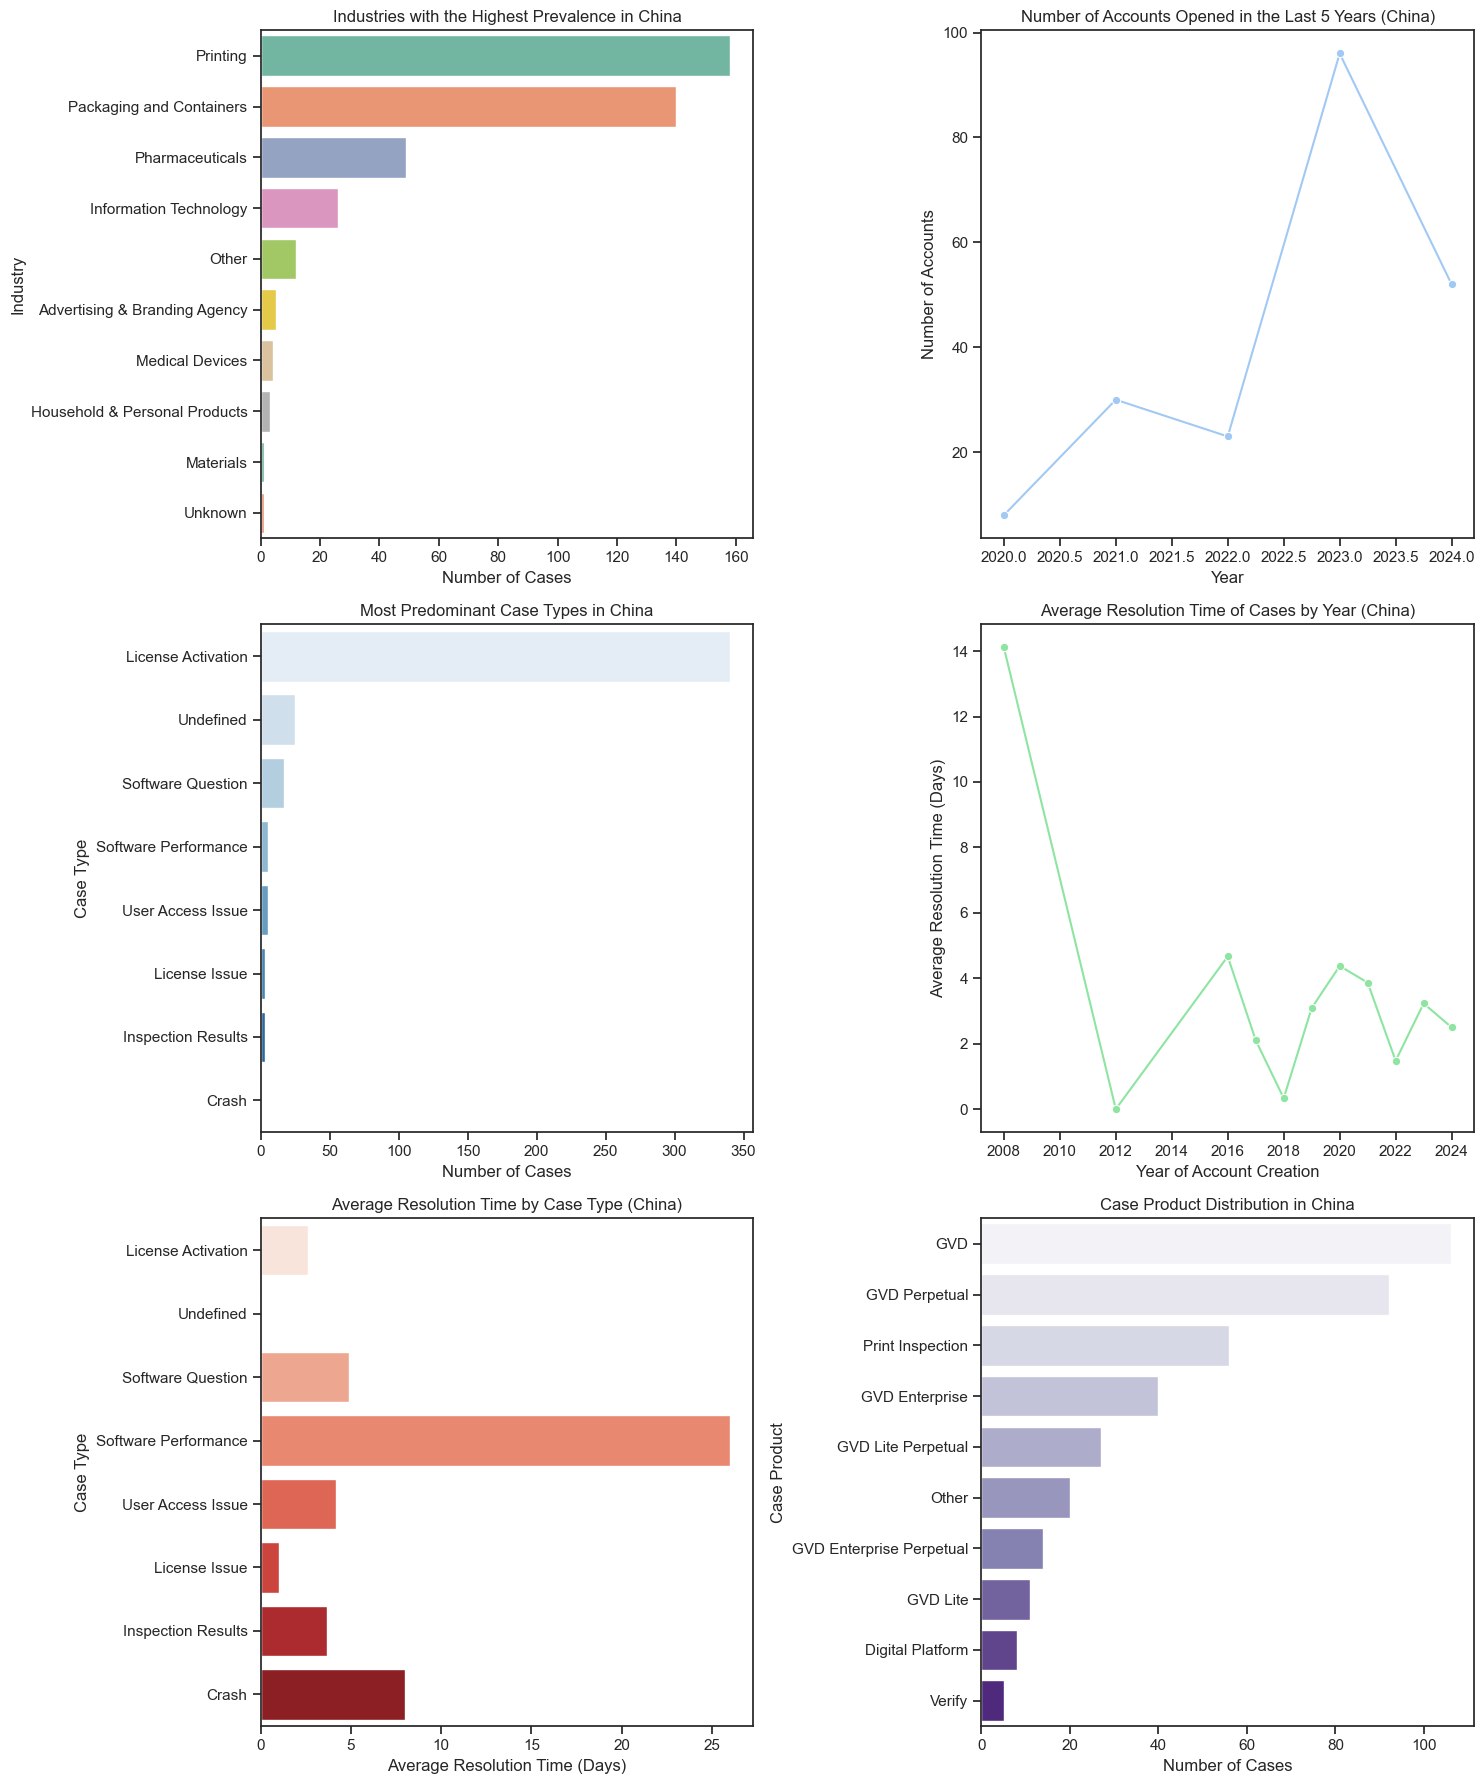

In [241]:
# Filter the data for cases in China
df_china_cases = df_combined[df_combined['account_country'] == 'China']

# Calculate the resolution time for each case (in days)
df_china_cases['resolution_time'] = (df_china_cases['case_closed_date'] - df_china_cases['case_created_date']).dt.days

# 1. Industries with the highest prevalence in China
industry_counts_china = df_china_cases['account_industry'].value_counts().head(10)

# 2. Number of accounts opened in the last 5 years
df_china_accounts_last_5 = df_china_cases[df_china_cases['account_created_date'].dt.year >= (current_year - 5)]
account_counts_last_5_china = df_china_accounts_last_5['account_created_date'].dt.year.value_counts().sort_index()

# 3. Most predominant case types in China
case_type_counts_china = df_china_cases['case_type'].value_counts().head(10)

# 4. Average resolution time of cases by industry in China
avg_resolution_time_china = df_china_cases.groupby('account_industry')['resolution_time'].mean().sort_values(ascending=False).head(10)

# 5. Case product distribution in China
case_product_counts_china = df_china_cases['case_product'].value_counts().head(10)

# 6. Average resolution time of cases by year in China
df_china_cases['year_created'] = df_china_cases['account_created_date'].dt.year
df_resolution_per_year_china = df_china_cases.groupby('year_created')['resolution_time'].mean().reset_index()

# 7. Average resolution time by case type in China
top_case_types_china = case_type_counts_china.index
avg_resolution_by_case_type_china = df_china_cases[df_china_cases['case_type'].isin(top_case_types_china)].groupby('case_type')['resolution_time'].mean().loc[top_case_types_china]

# Create subplots for all the charts
fig, axes = plt.subplots(3, 2, figsize=(15, 18))

# Chart 1: Industries with the highest prevalence in China
sns.barplot(x=industry_counts_china.values, y=industry_counts_china.index, ax=axes[0, 0], palette='Set2')
axes[0, 0].set_title('Industries with the Highest Prevalence in China')
axes[0, 0].set_xlabel('Number of Cases')
axes[0, 0].set_ylabel('Industry')

# Chart 2: Number of accounts opened in the last 5 years (China)
sns.lineplot(data=account_counts_last_5_china.sort_index(), ax=axes[0, 1], marker='o', color='b')
axes[0, 1].set_title('Number of Accounts Opened in the Last 5 Years (China)')
axes[0, 1].set_xlabel('Year')
axes[0, 1].set_ylabel('Number of Accounts')

# Chart 3: Most predominant case types in China
sns.barplot(x=case_type_counts_china.values, y=case_type_counts_china.index, ax=axes[1, 0], palette='Blues')
axes[1, 0].set_title('Most Predominant Case Types in China')
axes[1, 0].set_xlabel('Number of Cases')
axes[1, 0].set_ylabel('Case Type')

# Chart 4: Average resolution time of cases by year (China)
sns.lineplot(data=df_resolution_per_year_china, x='year_created', y='resolution_time', marker='o', color='g', ax=axes[1, 1])
axes[1, 1].set_title('Average Resolution Time of Cases by Year (China)')
axes[1, 1].set_xlabel('Year of Account Creation')
axes[1, 1].set_ylabel('Average Resolution Time (Days)')

# Chart 5: Average resolution time by case type (China)
sns.barplot(x=avg_resolution_by_case_type_china.values, y=avg_resolution_by_case_type_china.index, ax=axes[2, 0], palette='Reds')
axes[2, 0].set_title('Average Resolution Time by Case Type (China)')
axes[2, 0].set_xlabel('Average Resolution Time (Days)')
axes[2, 0].set_ylabel('Case Type')

# Chart 6: Case product distribution in China
sns.barplot(x=case_product_counts_china.values, y=case_product_counts_china.index, ax=axes[2, 1], palette='Purples')
axes[2, 1].set_title('Case Product Distribution in China')
axes[2, 1].set_xlabel('Number of Cases')
axes[2, 1].set_ylabel('Case Product')

# Adjust layout to ensure all charts fit correctly
plt.tight_layout()
plt.show()

#### CANADA

/var/folders/86/t0s56lw963l8hq8z4bszh1j40000gn/T/ipykernel_1021/445430768.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/86/t0s56lw963l8hq8z4bszh1j40000gn/T/ipykernel_1021/445430768.py:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/86/t0s56lw963l8hq8z4bszh1j40000gn/T/ipykernel_1021/445430768.py:35: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same eff

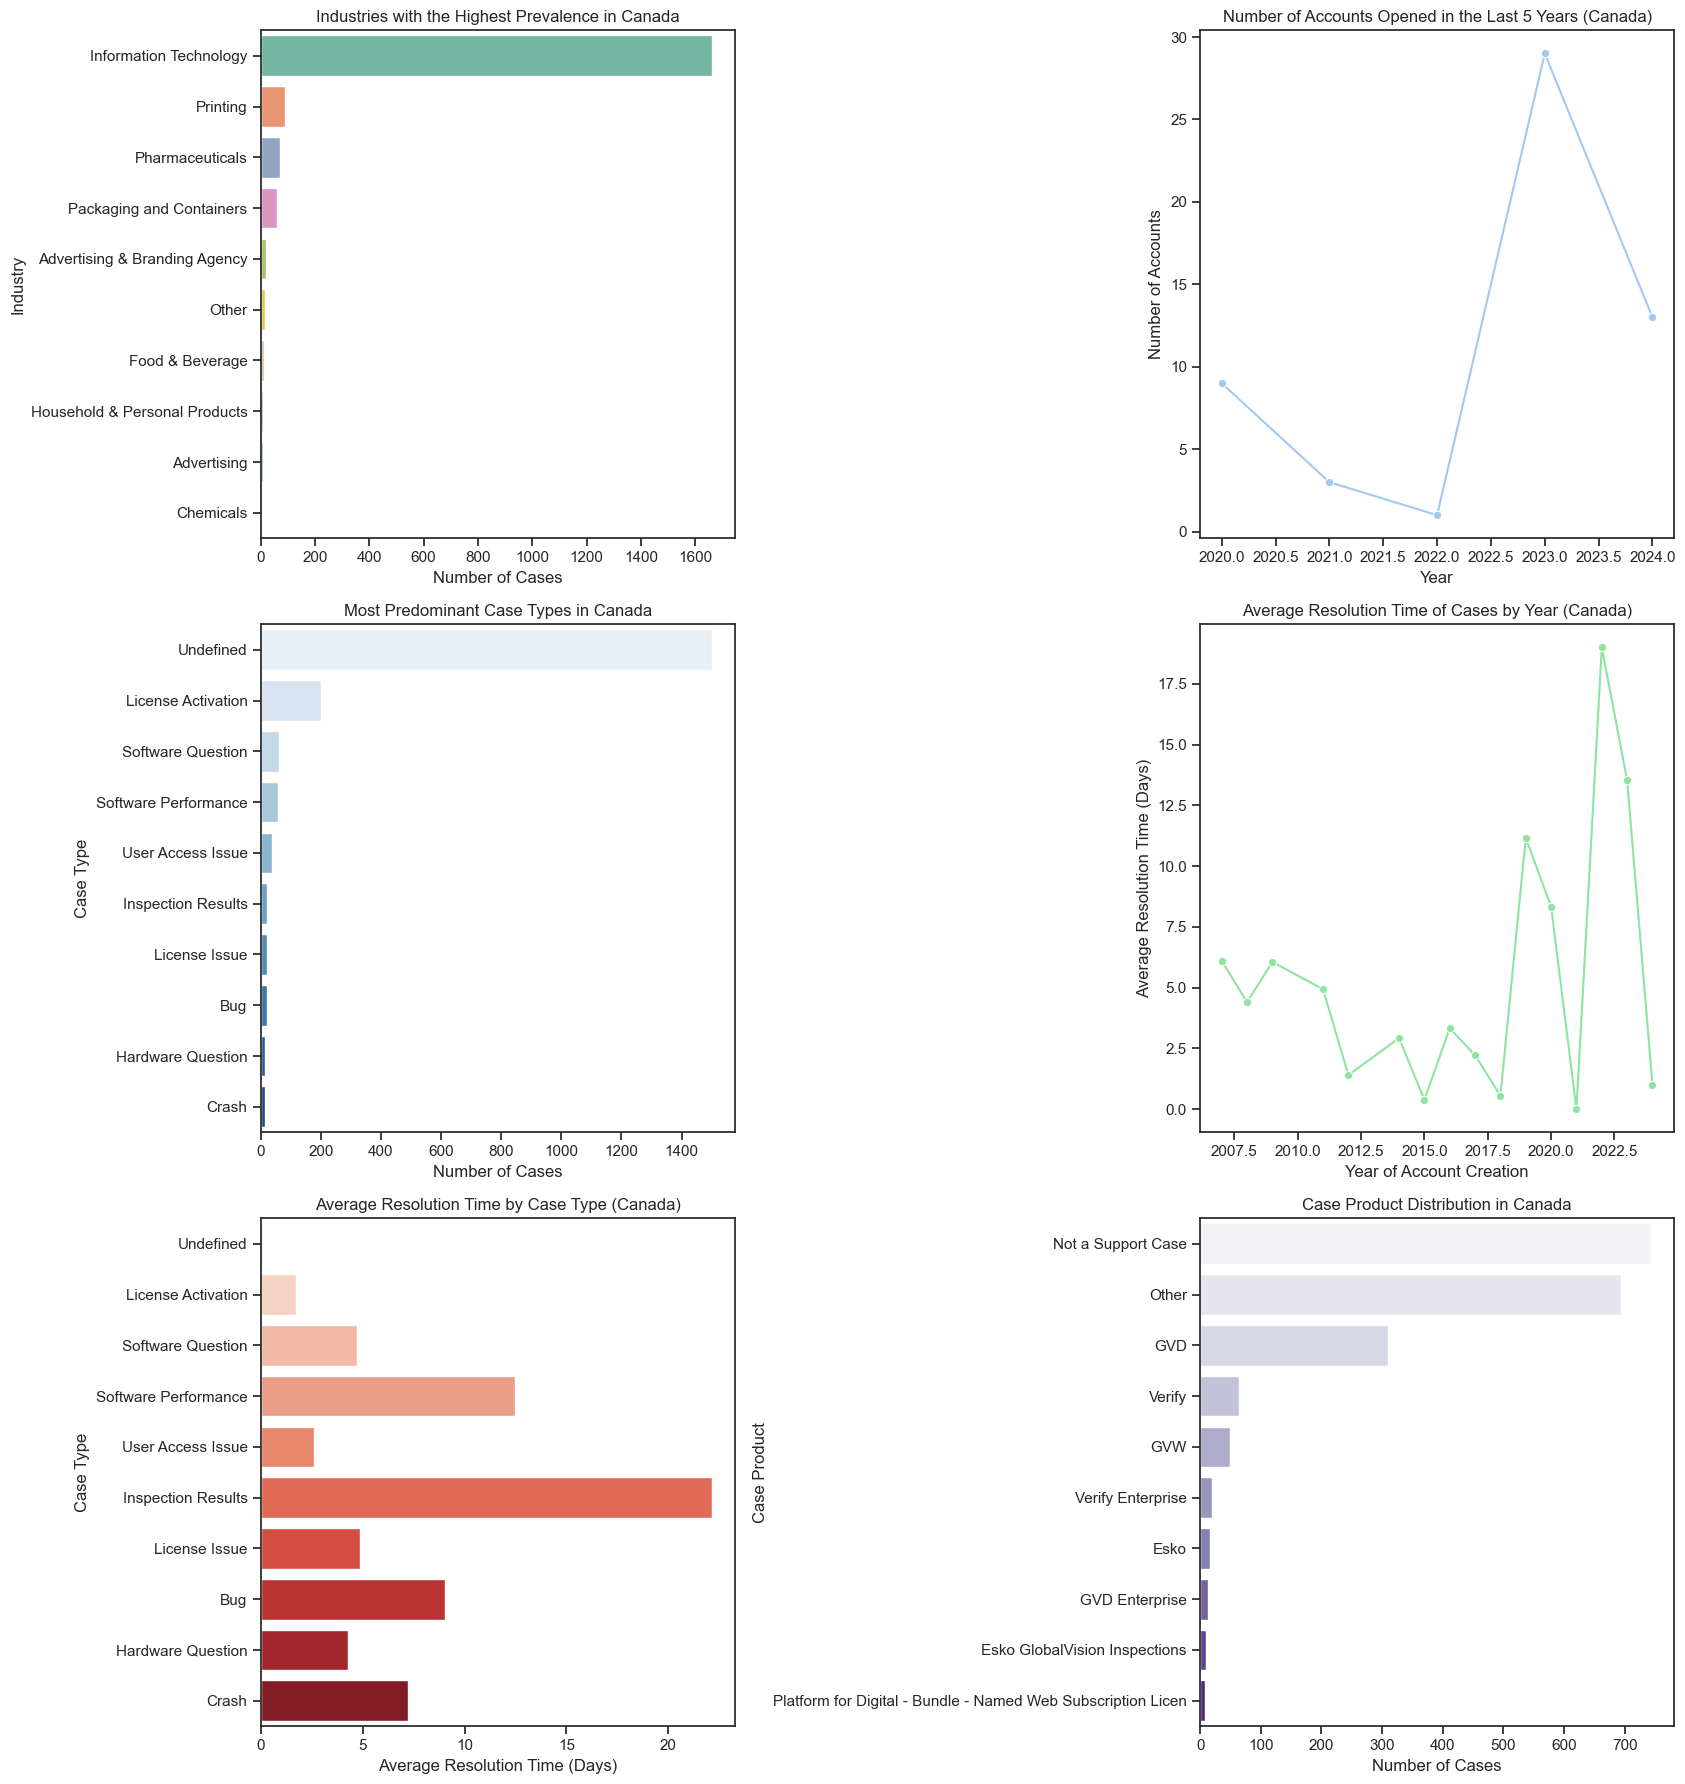

In [242]:
# Filter the data for cases in Canada
df_canada_cases = df_combined[df_combined['account_country'] == 'Canada']

# Calculate the resolution time for each case (in days)
df_canada_cases['resolution_time'] = (df_canada_cases['case_closed_date'] - df_canada_cases['case_created_date']).dt.days

# 1. Industries with the highest prevalence in Canada
industry_counts_canada = df_canada_cases['account_industry'].value_counts().head(10)

# 2. Number of accounts opened in the last 5 years
df_canada_accounts_last_5 = df_canada_cases[df_canada_cases['account_created_date'].dt.year >= (current_year - 5)]
account_counts_last_5_canada = df_canada_accounts_last_5['account_created_date'].dt.year.value_counts().sort_index()

# 3. Most predominant case types in Canada
case_type_counts_canada = df_canada_cases['case_type'].value_counts().head(10)

# 4. Average resolution time of cases by industry in Canada
avg_resolution_time_canada = df_canada_cases.groupby('account_industry')['resolution_time'].mean().sort_values(ascending=False).head(10)

# 5. Case product distribution in Canada
case_product_counts_canada = df_canada_cases['case_product'].value_counts().head(10)

# 6. Average resolution time of cases by year in Canada
df_canada_cases['year_created'] = df_canada_cases['account_created_date'].dt.year
df_resolution_per_year_canada = df_canada_cases.groupby('year_created')['resolution_time'].mean().reset_index()

# 7. Average resolution time by case type in Canada
top_case_types_canada = case_type_counts_canada.index
avg_resolution_by_case_type_canada = df_canada_cases[df_canada_cases['case_type'].isin(top_case_types_canada)].groupby('case_type')['resolution_time'].mean().loc[top_case_types_canada]

# Create subplots for all the charts
fig, axes = plt.subplots(3, 2, figsize=(17, 18))

# Chart 1: Industries with the highest prevalence in Canada
sns.barplot(x=industry_counts_canada.values, y=industry_counts_canada.index, ax=axes[0, 0], palette='Set2')
axes[0, 0].set_title('Industries with the Highest Prevalence in Canada')
axes[0, 0].set_xlabel('Number of Cases')
axes[0, 0].set_ylabel('Industry')

# Chart 2: Number of accounts opened in the last 5 years (Canada)
sns.lineplot(data=account_counts_last_5_canada.sort_index(), ax=axes[0, 1], marker='o', color='b')
axes[0, 1].set_title('Number of Accounts Opened in the Last 5 Years (Canada)')
axes[0, 1].set_xlabel('Year')
axes[0, 1].set_ylabel('Number of Accounts')

# Chart 3: Most predominant case types in Canada
sns.barplot(x=case_type_counts_canada.values, y=case_type_counts_canada.index, ax=axes[1, 0], palette='Blues')
axes[1, 0].set_title('Most Predominant Case Types in Canada')
axes[1, 0].set_xlabel('Number of Cases')
axes[1, 0].set_ylabel('Case Type')

# Chart 4: Average resolution time of cases by year (Canada)
sns.lineplot(data=df_resolution_per_year_canada, x='year_created', y='resolution_time', marker='o', color='g', ax=axes[1, 1])
axes[1, 1].set_title('Average Resolution Time of Cases by Year (Canada)')
axes[1, 1].set_xlabel('Year of Account Creation')
axes[1, 1].set_ylabel('Average Resolution Time (Days)')

# Chart 5: Average resolution time by case type (Canada)
sns.barplot(x=avg_resolution_by_case_type_canada.values, y=avg_resolution_by_case_type_canada.index, ax=axes[2, 0], palette='Reds')
axes[2, 0].set_title('Average Resolution Time by Case Type (Canada)')
axes[2, 0].set_xlabel('Average Resolution Time (Days)')
axes[2, 0].set_ylabel('Case Type')

# Chart 6: Case product distribution in Canada
sns.barplot(x=case_product_counts_canada.values, y=case_product_counts_canada.index, ax=axes[2, 1], palette='Purples')
axes[2, 1].set_title('Case Product Distribution in Canada')
axes[2, 1].set_xlabel('Number of Cases')
axes[2, 1].set_ylabel('Case Product')

# Adjust layout to ensure all charts fit correctly
plt.tight_layout()
plt.show()

# Part 4: Business Insights

## 1. What are the key insights you derived from the data and visualizations?


1 - USA has the highest demand for support, followed by China and Canada. 

2 - The table below quickly shows the average support resolution time by case type in the USA

| Case Type  | Average time |
| ------------- | ------------- |
| License Activation  | +2 days  |
| Software Performance  | +10 days  |
| User Access issue | +4 days |

3 - Top 3 Industries with the most cases. Pharmaceuticals, Information Technology and Printing. The table below shows the average resolution time for each case.

| Industry  | Average time |
| ------------- | ------------- |
| Pharmaceuticals  | +6 days  |
| Information Technology  | +-1 day  |
| Printing | +5 days |

4 - Distribution of Severe Cases: Severe cases are more prevalent in the USA, especially in the pharmaceutical industry.

5 - Through the graphs that were generated, it can be seen that the United States is the leader in serious cases, especially in the pharmaceutical industry, which also has an average resolution time of more than 6 days, which is absurd and needs to be improved.

6 - I was able to observe an inconsistency in solving technology-related problems. Canada practically has cases related to the technology industry that have an excellent average resolution time (Approximately 1 day), however, the United States has two problems related to technology, "Software Performace" and "User Access Issue", respectively having + 10 days and +4 days, as these are technology-related problems, they should be resolved faster!

7 - Canada has a serious problem in documenting and specifying the type of case being analyzed, there is a lack of data to conclude better data.


## 2. Propose two actionable recommendations that the business could take based on these insights.

1. Allocate More Support Resources to the US: Case demand in the US is significantly higher, which may justify increasing support staff or automating processes. 40.2% of cases are from the USA, and with a delay of +10 days for Software Performance issues and +4 days for User Access Issues, it is clear that the IT team urgently needs to be revised to reduce this time considerably. The pharmaceutical industry represents 42.2% of cases per industry in the United States, and has an average resolution time of +6 days, which demonstrates once again that the USA has a serious problem with resolution time for open supports.

2. The company must prioritize collecting complete and consistent data for Canada, seeking to fill any gaps in information such as case details, affected sectors and resolution times. One way to do this is to better integrate Canadian support systems with data analytics platforms, ensuring all interactions and metrics are captured correctly. With more data available, it will be possible to analyze further and identify country-specific patterns.